In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import skimage
import os
import cv2
import glob
import pytesseract
from matplotlib import transforms
from sklearn.linear_model import LinearRegression
from exported_functions import *
os.environ['PATH'] += os.pathsep + r'C:\Program Files\Tesseract-OCR\tesseract.exe'


# Correlation between physical activity and life expectancy

## Preface

### Abstract

The starting point of this research is the hypothesis, that there is a relationship between life expectancy (health) and physical activity. Here the focus is on walking and cycling since they are the most convenient way of integrating exercise into the daily life of the modern person.

Two datasets and their correlation with life expectancy are analyzed. The one shows a fair to moderate connection between walking and life expectancy. In the case of women, the correlation with walking is higher. The second dataset shows some connection between aerobic sports and life span.

Two meta-analyses are used so that other physical activities could be covered. Those with the best health benefits are vigorous or require endurance. Among the former athletes those who practiced long-distance cycling, rowing, long-distance running, and cross-country skiing have the longest lives.

### Introduction

As a student, enrolled in Software Engineering and AI programs, I sit in a chair in front of my laptop all day long. I am aware that this is not good for my health. But I don't know what the best for it is.
In the last years, many studies were published about how many hours of physical activity are optimal for our health. According to World Health Organization, it is good for adults to do at least 150 minutes of moderate-intensity aerobic physical activity, and for additional health benefits, to increase their moderate-intensity aerobic physical activity to 300 minutes per week [[1]](#Cell1). That means, for example, walking between 20 and 40 minutes daily. 

Other studies recommend walking between 7000 and 9999 steps daily [[2]](#Cell2). It is more than an hour walk.

Walking and cycling are better than other kinds of physical activity (like jogging) because are joint-friendly. On the other hand, riding a bike to work is a preferable option - it saves this so valuable and scarce thing called time. Therefore, walking and cycling (to work, to the shop) are the easiest and most convenient physical activities that a modern person can practice on a daily basis.

All these studies shed light on the fact that modern people need physical activity more than ever, but questions remain ambiguously answered. How long it should be? Intensive or not? How often during the week? Which kind of physical activity is best?

Modern people have very little time for exercise, so "optimal" is the key. Therefore, <b>our hypothesis is that there is a relationship between life span and physical activity</b>. Moreover, we want to see <b>what kind of activity has the biggest impact on longevity, how much time should be practiced, and how often. And we (as modern people) could hope walking or cycling to be this activity</b>.

How can we measure something like health and exercise on such a large scale so that we can extract conclusions? One logical way is to compare different nations' physical activities and their life expectancy.

After spending some time researching the problem, it turned out that there are similar researches already made. "Does Physical Activity Increase Life Expectancy? A Review of the Literature" is a meta-analysis of more than 20 papers about this problem. The conclusion of this article is that "physical activity reduces many major mortality risk factors including arterial hypertension, diabetes mellitus type 2, dyslipidemia, coronary heart disease, stroke, and cancer. All-cause mortality is decreased by about 30% to 35% in physically active as compared
to inactive subjects." [[3]](#Cell3) We will return to this research later.

Another meta-analysis of 93 articles (the median sample size of each is 6,382, ranging from 148 to 654,827) also shows that among the top life-span factors (physical activity, healthy diet, 7-8 hours of sleep, weight control) physical activity has the highest impact. According to the data walking group has a mortality rate of 28% lower than the control group (that walks <10 min per day or <5 km per week). The mortality rate is 19% lower for the other physical activities. However, researchers underline that physical activity's effect on life span shows better results in the case of women. Physical activity is followed by a healthy diet (15%) and duration of sleep (13%). Researchers conclude that:
"Specifically, doing regular physical activity, engaging in leisure activities, sleeping 7–8 h a day, and staying outside the BMI ranges considered as underweight or obesity are habits that each separately has a greater probability associated with survival after a period of several years." [[4]](#Cell4)

Since we already know that walking has the potential to be the best option, the problem now is how much walking is optimal for longevity. And whether cycling, our preferable physical activity, has some chance agains walking.

### Problems

One problem of our approach could be the difference between generations - we use data for physical activity and life span during the recent years, but longevity is a result of long-term factors (and physical activity). The habits of young people today will reflect on their life expectancy after decades. At the same time, some of their habits will change. That's why we will include the results of long-term studies (up to 40 years). 

Another problem is that there is no dataset that gives information firsthand, not even one that exhausts the problem. The picture should be assembled like a puzzle.

### Data preparation

We are going to calculate some data in order to find which physical activity has a high correlation with life span. The adjectives that will be used for naming the strength of correlation coefficients correspond to the Chan YH scale [[5]](#Cell5). This choice is made on the base of the closest research area (medicine). 

Since life expectancy is going to be our base for comparison, we are going to prepare it for future analysis.

#### Life expectancy

Life expectancy, according to the World Health Organization, is "the average number of years that a newborn could expect to live if he or she were to pass through life exposed to the sex- and age-specific death rates prevailing at the time of his or her birth, for a specific year, in a given country, territory, or geographic area"[[6 - from the metadata of the resource]](#Cell6).

World Health Organization is also the data source that will be used for life expectancy comparison between the countries[[6]](#Cell6) (downloaded in the local folder datasets). It shows the average longevity for 2000, 2010, 2015, and 2019 year. 

In spite of the fact that there is even more contemporary data, it won`t be used due to COVID effects on life span.

In [3]:
life_span_dataset = pd.read_csv("datasets/life_span.csv")

In [4]:
life_span_dataset

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,WHOSIS_000001,Life expectancy at birth (years),text,AFR,Africa,Country,LSO,Lesotho,Year,2019,...,NaN,NaN,NaN,NaN,NaN,47.66,NaN,NaN,EN,2020-12-03T22:00:00.000Z
1,WHOSIS_000001,Life expectancy at birth (years),text,AFR,Africa,Country,CAF,Central African Republic,Year,2019,...,NaN,NaN,NaN,NaN,NaN,50.21,NaN,NaN,EN,2020-12-03T22:00:00.000Z
2,WHOSIS_000001,Life expectancy at birth (years),text,AFR,Africa,Country,LSO,Lesotho,Year,2019,...,NaN,NaN,NaN,NaN,NaN,50.75,NaN,NaN,EN,2020-12-03T22:00:00.000Z
3,WHOSIS_000001,Life expectancy at birth (years),text,AFR,Africa,Country,CAF,Central African Republic,Year,2019,...,NaN,NaN,NaN,NaN,NaN,53.10,NaN,NaN,EN,2020-12-03T22:00:00.000Z
4,WHOSIS_000001,Life expectancy at birth (years),text,AFR,Africa,Country,SWZ,Eswatini,Year,2019,...,NaN,NaN,NaN,NaN,NaN,53.36,NaN,NaN,EN,2020-12-03T22:00:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,WHOSIS_000015,Life expectancy at age 60 (years),text,EUR,Europe,Country,ESP,Spain,Year,2000,...,NaN,NaN,NaN,NaN,NaN,24.82,NaN,NaN,EN,2020-12-03T22:00:00.000Z
4388,WHOSIS_000015,Life expectancy at age 60 (years),text,WPR,Western Pacific,Country,AUS,Australia,Year,2000,...,NaN,NaN,NaN,NaN,NaN,24.85,NaN,NaN,EN,2020-12-03T22:00:00.000Z
4389,WHOSIS_000015,Life expectancy at age 60 (years),text,AMR,Americas,Country,PAN,Panama,Year,2000,...,NaN,NaN,NaN,NaN,NaN,24.92,NaN,NaN,EN,2020-12-03T22:00:00.000Z
4390,WHOSIS_000015,Life expectancy at age 60 (years),text,EUR,Europe,Country,FRA,France,Year,2000,...,NaN,NaN,NaN,NaN,NaN,25.29,NaN,NaN,EN,2020-12-03T22:00:00.000Z


##### Data Tidying and Cleaning

 - The "Indicator" column contains two values: 'Life expectancy at birth (years)' and 'Life expectancy at age 60 (years)'. We need only the first one and its data.

In [5]:
life_span_dataset["Indicator"].unique()

array(['Life expectancy at birth (years)',
       'Life expectancy at age 60 (years)'], dtype=object)

In [6]:
life_span_dataset = life_span_dataset[life_span_dataset["Indicator"] == 'Life expectancy at birth (years)']

In [7]:
life_span_dataset["Indicator"].unique()

array(['Life expectancy at birth (years)'], dtype=object)

 - For the goal of our research, we need columns "Location" (the name of the country), "Period" (year of the data), "Dim1" (gender), "Value" (life expectancy). We will rename the columns with more clear for our research terms. 

In [8]:
life_span = pd.DataFrame({"country": life_span_dataset["Location"], "year": life_span_dataset["Period"], "gender": life_span_dataset["Dim1"], "life expectancy": life_span_dataset["Value"]})

 - Because genders of different countries are not ordered, as well as the years of research, we will sort by country, year, and gender.

In [9]:
life_span = life_span.sort_values(["country", "year", "gender"])

In [10]:
life_span

,country,year,gender,life expectancy
3392,Afghanistan,2000,Both sexes,54.99
3395,Afghanistan,2000,Female,55.42
3389,Afghanistan,2000,Male,54.57
2278,Afghanistan,2010,Both sexes,59.94
2284,Afghanistan,2010,Female,60.30
...,...,...,...,...
1159,Zimbabwe,2015,Female,60.96
1111,Zimbabwe,2015,Male,55.73
30,Zimbabwe,2019,Both sexes,60.68
80,Zimbabwe,2019,Female,63.61


## Types of Physical Activity

 ### Walking

While most studies rely on participants' self-reporting about the average time of their physical activity, nowadays we have a lot more objective data. The project "Activity Inequality" leverages smartphones with built-in accelerometry to measure daily steps at a planetary scale. It includes data from 717,527 individuals across 111 countries [[7]](#Cell7). Userdata by users with at least ten days of steps data was considered good for collecting (p.5 [[17]](#Cell17)). Due to the objective nature of the data, we put this dataset as the most important one for our analysis. That's why we are going to start with it.  

In [11]:
steps_data = pd.read_csv("https://raw.githubusercontent.com/timalthoff/activityinequality/master/data/world_map_steps_average_20170510.csv")

In [12]:
steps_data

,region,steps_mean_filtered
0,Albania,5788.506180
1,Algeria,4205.991197
2,Argentina,4852.163338
3,Armenia,5664.838315
4,Australia,4941.485728
...,...,...
106,USA,4773.860795
107,Uruguay,4303.101498
108,Uzbekistan,5463.708894
109,Venezuela,3645.303127


#### Problem
Potential problem here could be the indirect relationship between walking (walkable cities therefore a country that can provide good infrastructure for pedestrians) and rich countries.

In [13]:
steps_data.sort_values("steps_mean_filtered", ascending=False).head(15)

,region,steps_mean_filtered
41,Hong Kong SAR China,6879.679031
60,Macau SAR China,6346.895307
21,China,6188.650349
103,Ukraine,6106.926110
51,Japan,6009.770680
11,Belarus,5976.774343
86,Russia,5969.310798
94,Spain,5935.706416
96,Sweden,5862.569473
0,Albania,5788.506180


We see that this assumption is not supported by the data, since among the top 15 we meet countries with middle income like Ucraine, Belarus, Russia, Albania, Armenia, Moldova (according to World Bank classification [[8]](#Cell8)). Steps data does not include countries from the low-income group, probably due to insufficient data.

#### Comparison by Steps

We are going to use the average steps for every country and compare them with the average life span.

##### Data Tidying and Cleaning

Before we go on, it`s necessary to fill some gaps between the tables.

 - First, there are differences in the names of some countries. So we are going to correct them:

In [14]:
steps_data['region'] = replace_name(steps_data['region'], 'Bolivia', 'Bolivia (Plurinational State of)')
steps_data['region'] = replace_name(steps_data['region'], 'Brunei', 'Brunei Darussalam')
steps_data['region'] = replace_name(steps_data['region'], 'Czech Republic', 'Czechia')
steps_data['region'] = replace_name(steps_data['region'], 'Macedonia', 'The former Yugoslav Republic of Macedonia')
steps_data['region'] = replace_name(steps_data['region'], 'Moldova', 'Republic of Moldova')
steps_data['region'] = replace_name(steps_data['region'], 'Russia', 'Russian Federation')
steps_data['region'] = replace_name(steps_data['region'], 'South Korea', 'Republic of Korea')
steps_data['region'] = replace_name(steps_data['region'], 'Trinidad', 'Trinidad and Tobago')
steps_data['region'] = replace_name(steps_data['region'], 'Turkey', 'Türkiye')
steps_data['region'] = replace_name(steps_data['region'], 'UK', 'United Kingdom of Great Britain and Northern Ireland')
steps_data['region'] = replace_name(steps_data['region'], 'USA', 'United States of America')
steps_data['region'] = replace_name(steps_data['region'], 'Venezuela', 'Venezuela (Bolivarian Republic of)')
steps_data['region'] = replace_name(steps_data['region'], 'Vietnam', 'Viet Nam')

In [15]:
steps_data[steps_data["region"] == "Bolivia (Plurinational State of)"]

,region,steps_mean_filtered
13,Bolivia (Plurinational State of),4608.545705


 - Another problem emerges:
Hong Kong, Macau, Palestine, Puerto Rico, and Taiwan  exist in the steps data, but, for political reasons, not in the WHO data. The first two cannot be dropped since they are the walking leaders. Let's see if there is a substantial difference in steps between these countries and the countries they are part of in order to decide what to do with them.

    - Hong Kong, Macau, Taiwan (part of China):

In [16]:
steps_data[(steps_data["region"] == "Taiwan") | (steps_data["region"] == "Hong Kong SAR China") | (steps_data["region"] == "Macau SAR China") | (steps_data["region"] == "China")]

,region,steps_mean_filtered
21,China,6188.650349
41,Hong Kong SAR China,6879.679031
60,Macau SAR China,6346.895307
98,Taiwan,5000.017698


There is a large walking gap between all these places. We should add some data to the dataset of WHO.

Hong Kong:
We find the missing data for Hong Kong on the World Bank website [[9]](#Cell9).
Hong Kong both sexes - 2000: 81, 2010: 83, 2015: 84, 2019: 85;
Hong Kong males - 2000: 78, 2010: 80, 2015: 81, 2019: 82;
Honk Kong females - 2000: 84, 2010: 86, 2015: 87, 2019: 88.

Macau [[10]](#Cell10):
both sexes - 2000: 80, 2010: 83, 2015: 84, 2019: 84;
males - 2000: 78, 2010: 80, 2015: 81, 2019: 81;
females - 2000: 83, 2010: 86, 2015: 87, 2019: 87.

Taiwan:
both sexes - 2000: 76, 2010: 79, 2015: 79, 2019: 80 [[11]](#Cell11)
The only genders data found is for 2019 [[12]](#Cell12)
males - 2019: 77;
females - 2019: 84

In [17]:
life_span = add_values_to_a_table(life_span, [{'country': 'Hong Kong SAR China', 'year': 2000, 'gender': 'Both sexes', 'life expectancy': 81},
{'country': 'Hong Kong SAR China', 'year': 2000, 'gender': 'Female', 'life expectancy': 84},
{'country': 'Hong Kong SAR China', 'year': 2000, 'gender': 'Male', 'life expectancy': 78},
{'country': 'Hong Kong SAR China', 'year': 2010, 'gender': 'Both sexes', 'life expectancy': 83},
{'country': 'Hong Kong SAR China', 'year': 2010, 'gender': 'Female', 'life expectancy': 86},
{'country': 'Hong Kong SAR China', 'year': 2010, 'gender': 'Male', 'life expectancy': 80},
{'country': 'Hong Kong SAR China', 'year': 2015, 'gender': 'Both sexes', 'life expectancy': 84},
{'country': 'Hong Kong SAR China', 'year': 2015, 'gender': 'Female', 'life expectancy': 87},
{'country': 'Hong Kong SAR China', 'year': 2015, 'gender': 'Male', 'life expectancy': 81},
{'country': 'Hong Kong SAR China', 'year': 2019, 'gender': 'Both sexes', 'life expectancy': 85},
{'country': 'Hong Kong SAR China', 'year': 2019, 'gender': 'Female', 'life expectancy': 88},
{'country': 'Hong Kong SAR China', 'year': 2019, 'gender': 'Male', 'life expectancy': 82},
{'country': 'Macau SAR China', 'year': 2000, 'gender': 'Both sexes', 'life expectancy': 80},
{'country': 'Macau SAR China', 'year': 2000, 'gender': 'Female', 'life expectancy': 83},
{'country': 'Macau SAR China', 'year': 2000, 'gender': 'Male', 'life expectancy': 78},
{'country': 'Macau SAR China', 'year': 2010, 'gender': 'Both sexes', 'life expectancy': 83},
{'country': 'Macau SAR China', 'year': 2010, 'gender': 'Female', 'life expectancy': 86},
{'country': 'Macau SAR China', 'year': 2010, 'gender': 'Male', 'life expectancy': 80},
{'country': 'Macau SAR China', 'year': 2015, 'gender': 'Both sexes', 'life expectancy': 84},
{'country': 'Macau SAR China', 'year': 2015, 'gender': 'Female', 'life expectancy': 87},
{'country': 'Macau SAR China', 'year': 2015, 'gender': 'Male', 'life expectancy': 81},
{'country': 'Macau SAR China', 'year': 2019, 'gender': 'Both sexes', 'life expectancy': 84},
{'country': 'Macau SAR China', 'year': 2019, 'gender': 'Female', 'life expectancy': 87},
{'country': 'Macau SAR China', 'year': 2019, 'gender': 'Male', 'life expectancy': 81},
{'country': 'Taiwan', 'year': 2000, 'gender': 'Both sexes', 'life expectancy': 76},
{'country': 'Taiwan', 'year': 2010, 'gender': 'Both sexes', 'life expectancy': 79},
{'country': 'Taiwan', 'year': 2015, 'gender': 'Both sexes', 'life expectancy': 79},
{'country': 'Taiwan', 'year': 2019, 'gender': 'Both sexes', 'life expectancy': 80},
{'country': 'Taiwan', 'year': 2019, 'gender': 'Female', 'life expectancy': 84},
{'country': 'Taiwan', 'year': 2019, 'gender': 'Male', 'life expectancy': 77}])


The problem is that there is no reliable data for China life expectancy without these three regions (their life span is higher than the China's total life span). So we cannot reduce its life span.

    - Puerto Rico (unincorporated territory of the USA):

In [18]:
steps_data[(steps_data["region"] == "United States of America") | (steps_data["region"] == "Puerto Rico")]

,region,steps_mean_filtered
83,Puerto Rico,3910.540000
106,United States of America,4773.860795


Here the difference is quite big as well. Let`s add Puerto Rico to the WHO dataset.
The source for the missing data is the World Bank website again [[13]](#Cell13).
Both sexes - 2000: 77, 2010: 78, 2015: 79, 2019: 80;
females - 2000: 81, 2010: 82, 2015: 83, 2019: 83;
males = 2000: 73, 2010: 75, 2015: 76, 2019: 77.


In [19]:
life_span = add_values_to_a_table(life_span, [{'country': 'Puerto Rico', 'year': 2000, 'gender': 'Both sexes', 'life expectancy': 77},
{'country': 'Puerto Rico', 'year': 2000, 'gender': 'Female', 'life expectancy': 81},
{'country': 'Puerto Rico', 'year': 2000, 'gender': 'Male', 'life expectancy': 73},
{'country': 'Puerto Rico', 'year': 2010, 'gender': 'Both sexes', 'life expectancy': 78},
{'country': 'Puerto Rico', 'year': 2010, 'gender': 'Female', 'life expectancy': 82},
{'country': 'Puerto Rico', 'year': 2010, 'gender': 'Male', 'life expectancy': 75},
{'country': 'Puerto Rico', 'year': 2015, 'gender': 'Both sexes', 'life expectancy': 79},
{'country': 'Puerto Rico', 'year': 2015, 'gender': 'Female', 'life expectancy': 83},
{'country': 'Puerto Rico', 'year': 2015, 'gender': 'Male', 'life expectancy': 76},
{'country': 'Puerto Rico', 'year': 2019, 'gender': 'Both sexes', 'life expectancy': 80},
{'country': 'Puerto Rico', 'year': 2019, 'gender': 'Female', 'life expectancy': 83},
{'country': 'Puerto Rico', 'year': 2019, 'gender': 'Male', 'life expectancy': 77}])

We can exclude Puerto Rico from the USA life expectancy data, but it is not necessary. The average life span of the USA for 2000 and 2015 is the same as that of Puerto Rico. In 2010 in the USA the average life is one year longer, but in 2019 Puerto Rico is ahead of the USA by one year. This defference would not affect the results significantly (see the comparison [[14]](#Cell14)).

    - Palestine

In [20]:
steps_data[(steps_data["region"] == "Palestine") | (steps_data["region"] == "Israel")]

,region,steps_mean_filtered
48,Israel,5033.124426
77,Palestine,5044.077160


Although Palestine can be dropped due to a small difference, we will not do this because about a 10-year gap in life span between Palestine and Israel. We will include Palestine in the WHO data. The source for West Bank and Gaza longevity is the World Bank [[15]](#Cell15).
Both sexes - 2000: 71, 2010: 73, 2015: 73, 2019: 74;
male - 2000: 70, 2010: 71, 2015: 72, 2019: 72;
female - 2000: 73, 2010: 75, 2015: 75, 2019: 76.

In [21]:
life_span = add_values_to_a_table(life_span, [{'country': 'Palestine', 'year': 2000, 'gender': 'Both sexes', 'life expectancy': 71},
{'country': 'Palestine', 'year': 2000, 'gender': 'Female', 'life expectancy': 73},
{'country': 'Palestine', 'year': 2000, 'gender': 'Male', 'life expectancy': 70},
{'country': 'Palestine', 'year': 2010, 'gender': 'Both sexes', 'life expectancy': 73},
{'country': 'Palestine', 'year': 2010, 'gender': 'Female', 'life expectancy': 75},
{'country': 'Palestine', 'year': 2010, 'gender': 'Male', 'life expectancy': 71},
{'country': 'Palestine', 'year': 2015, 'gender': 'Both sexes', 'life expectancy': 73},
{'country': 'Palestine', 'year': 2015, 'gender': 'Female', 'life expectancy': 75},
{'country': 'Palestine', 'year': 2015, 'gender': 'Male', 'life expectancy': 72},
{'country': 'Palestine', 'year': 2019, 'gender': 'Both sexes', 'life expectancy': 74},
{'country': 'Palestine', 'year': 2019, 'gender': 'Female', 'life expectancy': 76},
{'country': 'Palestine', 'year': 2019, 'gender': 'Male', 'life expectancy': 72}])

Now let`s compare the Israel's life span data (of WHO) with that of the World Bank (where the data about Israel and that for the West Bank and Gaza are provided separately) [[16]](#Cell16).  
Bothe sexes - 2000: 79, 2010: 82, 2015: 82, 2019: 83;
male - 2000: 77, 2010: 80, 2015: 80, 2019: 81;
female - 2000: 81, 2010: 84, 2015: 84, 2019: 85.

In [22]:
life_span[life_span["country"] == "Israel"]

,country,year,gender,life expectancy
960,Israel,2000,Both sexes,78.57
961,Israel,2000,Female,80.66
962,Israel,2000,Male,76.36
963,Israel,2010,Both sexes,81.56
964,Israel,2010,Female,83.34
965,Israel,2010,Male,79.62
966,Israel,2015,Both sexes,81.93
967,Israel,2015,Female,83.79
968,Israel,2015,Male,79.96
969,Israel,2019,Both sexes,82.62


When we take into account the fact that the World Bank data is rounded, the values are almost equal. The defference in the exceptions is insignificant (between 0.64 and 0.66): for 2000 - male - 76,36 vs 77; for 2010 - female - 83.34 vs 84; for 2019 - female - 84.36 vs 85. There is no need to change those values for Israel.

Before we proceed further, we should keep the life_span table in order:

In [23]:
life_span = life_span.sort_values(["country", "year", "gender"])

##### Comparison By Time

Let`s merge this table with our basic one(life expectancy by WHO):

In [24]:
steps_life_span = steps_data.merge(life_span, how="left", left_on="region", right_on="country")

In [25]:
steps_life_span

,region,steps_mean_filtered,country,year,gender,life expectancy
0,Albania,5788.506180,Albania,2000,Both sexes,73.55
1,Albania,5788.506180,Albania,2000,Female,76.92
2,Albania,5788.506180,Albania,2000,Male,70.65
3,Albania,5788.506180,Albania,2010,Both sexes,76.25
4,Albania,5788.506180,Albania,2010,Female,78.31
...,...,...,...,...,...,...
1321,Viet Nam,3643.407136,Viet Nam,2015,Female,77.61
1322,Viet Nam,3643.407136,Viet Nam,2015,Male,68.88
1323,Viet Nam,3643.407136,Viet Nam,2019,Both sexes,73.74
1324,Viet Nam,3643.407136,Viet Nam,2019,Female,78.11


In [26]:
#Check if our NaN job is done (all countries have the same name)
steps_life_span[steps_life_span["year"].isna()]

,region,steps_mean_filtered,country,year,gender,life expectancy


We can use data from any of the available years, but perhaps the latest will be most relevant. Let`s check this assumption: 

In [27]:
oldest_both = steps_life_span[(steps_life_span["year"] == 2000) & (steps_life_span["gender"] == "Both sexes")]

In [28]:
oldest_both['steps_mean_filtered'].corr(oldest_both['life expectancy'])

0.3027492452808024

The correlation with 2000 life span data is 0.30.

In [29]:
tenth_both = steps_life_span[(steps_life_span["year"] == 2010) & (steps_life_span["gender"] == "Both sexes")]

In [30]:
tenth_both['steps_mean_filtered'].corr(tenth_both['life expectancy'])

0.3632974917037924

The correlation with 2010 life span data starts getting bigger: 0.36.

In [31]:
fifteenth_both = steps_life_span[(steps_life_span["year"] == 2015) & (steps_life_span["gender"] == "Both sexes")]

In [32]:
fifteenth_both['steps_mean_filtered'].corr(fifteenth_both['life expectancy'])

0.4248311253211221

The correlation with 2015 life span data is even bigger: 0.42.

In [33]:
nineteenth_both = steps_life_span[(steps_life_span["year"] == 2019) & (steps_life_span["gender"] == "Both sexes")]

In [34]:
nineteenth_both['steps_mean_filtered'].corr(nineteenth_both['life expectancy'])

0.4541875028964775

The most up-to_date life span data is the highest data correlated to step values. It is worth noting that the steps data is collected
between July 2013 and December 2014 (p.5,[[17]](#Cell17)). So the correlation shows higher connection between 2013/2014 walking habits and 2019 life span than 2015 life span. 

Let`s see this correlation:

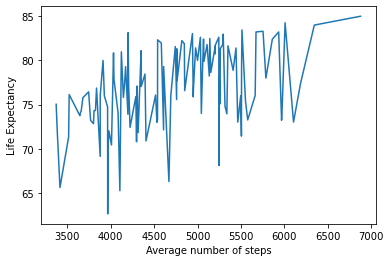

In [35]:
ax = sns.lineplot(data=nineteenth_both, x='steps_mean_filtered', y='life expectancy')
ax.set(xlabel='Average number of steps', ylabel='Life Expectancy')
plt.show()

Despite the huge variety in steps and life span, there is a permanent rise in life expectancy with the increasing number of steps. It is visible in the rise of the smallest life span values over 4000 steps and in the highest life span values over 4500 steps.

If we should find some rule applicable to our daily life, it will be - <b>the more steps, the better. Around 7000 steps and more is the best choice</b>. 7000 steps will take about 70 minutes daily [[18]](#Cell18)

Having in mind that steps show some kind of physical activity of people now, but life expectancy is a result of long-term factors, we can check if the bigger number of steps is related to faster improvement in longevity.

In [36]:
dt_19 = steps_life_span[(steps_life_span["year"] == 2019) & (steps_life_span["gender"] == "Both sexes")]

In [37]:
dt_00 = steps_life_span[(steps_life_span["year"] == 2000) & (steps_life_span["gender"] == "Both sexes")]

In [38]:
data_imrovement = dt_19.merge(dt_00, left_on="country", right_on="country")[["country", "year_x", "year_y", "life expectancy_x", "life expectancy_y", "steps_mean_filtered_x"]]

In [39]:
data_imrovement["lifespan_imrovement"] = data_imrovement["life expectancy_x"] - data_imrovement["life expectancy_y"]

In [40]:
data_imrovement

,country,year_x,year_y,life expectancy_x,life expectancy_y,steps_mean_filtered_x,lifespan_imrovement
0,Albania,2019,2000,78.00,73.55,5788.506180,4.45
1,Algeria,2019,2000,77.13,72.21,4205.991197,4.92
2,Argentina,2019,2000,76.58,74.09,4852.163338,2.49
3,Armenia,2019,2000,76.03,71.88,5664.838315,4.15
4,Australia,2019,2000,83.04,79.69,4941.485728,3.35
...,...,...,...,...,...,...,...
106,United States of America,2019,2000,78.50,76.69,4773.860795,1.81
107,Uruguay,2019,2000,77.10,74.82,4303.101498,2.28
108,Uzbekistan,2019,2000,73.01,65.27,5463.708894,7.74
109,Venezuela (Bolivarian Republic of),2019,2000,73.95,74.09,3645.303127,-0.14


In [41]:
data_imrovement['steps_mean_filtered_x'].corr(data_imrovement['lifespan_imrovement'])

0.18136190258916557

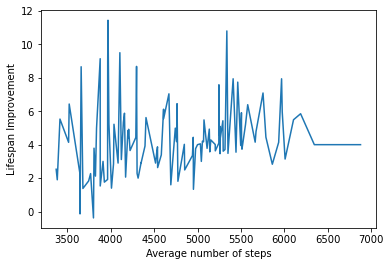

In [42]:
ax = sns.lineplot(data=data_imrovement, x='steps_mean_filtered_x', y='lifespan_imrovement')
ax.set(xlabel='Average number of steps', ylabel='Lifespan Improvement')
plt.show()

It turns out that <b>the number of steps daily is not correlated to the pace of longevity improvement</b>. 

##### Comparison By Gender

In [43]:
steps_life_span

,region,steps_mean_filtered,country,year,gender,life expectancy
0,Albania,5788.506180,Albania,2000,Both sexes,73.55
1,Albania,5788.506180,Albania,2000,Female,76.92
2,Albania,5788.506180,Albania,2000,Male,70.65
3,Albania,5788.506180,Albania,2010,Both sexes,76.25
4,Albania,5788.506180,Albania,2010,Female,78.31
...,...,...,...,...,...,...
1321,Viet Nam,3643.407136,Viet Nam,2015,Female,77.61
1322,Viet Nam,3643.407136,Viet Nam,2015,Male,68.88
1323,Viet Nam,3643.407136,Viet Nam,2019,Both sexes,73.74
1324,Viet Nam,3643.407136,Viet Nam,2019,Female,78.11


Since we know yet that 2019 WHO data is mort relevant, we are going to use it in order to find out if some gender specifics exist.

In [44]:
fm_data = steps_life_span[(steps_life_span["year"] == 2019) & (steps_life_span["gender"] == "Female")]

In [45]:
fm_data['steps_mean_filtered'].corr(fm_data['life expectancy'])

0.5074630435546105

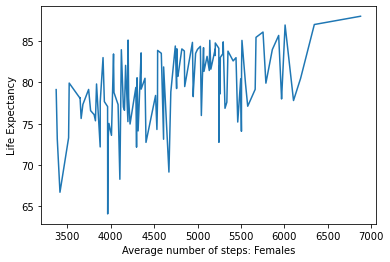

In [46]:
ax = sns.lineplot(data=fm_data, x='steps_mean_filtered', y='life expectancy')
ax.set(xlabel='Average number of steps: Females', ylabel='Life Expectancy')
plt.show()

There is a visible correlation between the bigger number of steps and women`s life span.

In [47]:
ml_data = steps_life_span[(steps_life_span["year"] == 2019) & (steps_life_span["gender"] == "Male")]

In [48]:
ml_data['steps_mean_filtered'].corr(ml_data['life expectancy'])

0.36996591046237204

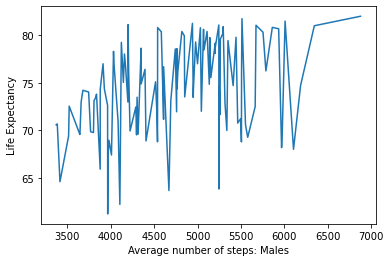

In [49]:
ax = sns.lineplot(data=ml_data, x='steps_mean_filtered', y='life expectancy')
ax.set(xlabel='Average number of steps: Males', ylabel='Life Expectancy')
plt.show()

Here the correlation between men`s number of steps and their life span is not so visible.

Data seems promising about females longevity and walking. But it needs to be checked separately - women's steps with women's life span, men's steps with men's life span. It is possible to get more accurate data, using the steps data by gender. For this reason, we will use a different dataset from the same source [[3]](#Cell3). 

In [50]:
gender_steps_data = pd.read_csv("https://raw.githubusercontent.com/timalthoff/activityinequality/master/data/activity_inequality_and_steps_gender_gap_20170508.csv")

In [51]:
gender_steps_data

,country,steps_gini,steps_female,steps_male,steps_gender_gap,steps_relative_gender_gap,must_label_ind
0,United States,0.302527,4151.369347,5558.400589,1407.031242,0.253136,True
1,United Kingdom,0.288125,4908.144630,5981.930972,1073.786342,0.179505,True
2,Japan,0.248464,5320.967642,6254.878638,933.910996,0.149309,True
3,Saudi Arabia,0.324759,2855.866170,4519.884659,1664.018488,0.368155,True
4,Canada,0.302882,4283.284336,5512.243212,1228.958875,0.222951,False
5,Australia,0.303666,4232.090591,5660.021777,1427.931187,0.252284,False
6,China,0.245277,6002.618543,6651.595553,648.977010,0.097567,False
7,Germany,0.266174,4816.593163,5398.038811,581.445648,0.107714,False
8,India,0.293393,3684.828507,4606.885706,922.057198,0.200148,False
9,France,0.268304,4824.724383,5350.523500,525.799117,0.098271,False


The new dataset includes information about 45 countries, but the one used so far - 111. The smaller number of regions covered is possible to reflect on the results and the global scale.

In [52]:
len(steps_life_span["region"].unique())

111

##### Data Tidying and Cleaning

 - Before merging, we should change some names that don`t match.

In [53]:
gender_steps_data['country'] = replace_name(gender_steps_data['country'], 'Czech Republic', 'Czechia')
gender_steps_data['country'] = replace_name(gender_steps_data['country'], 'Russia', 'Russian Federation')
gender_steps_data['country'] = replace_name(gender_steps_data['country'], 'South Korea', 'Republic of Korea')
gender_steps_data['country'] = replace_name(gender_steps_data['country'], 'Turkey', 'Türkiye')
gender_steps_data['country'] = replace_name(gender_steps_data['country'], 'United Kingdom', 'United Kingdom of Great Britain and Northern Ireland')
gender_steps_data['country'] = replace_name(gender_steps_data['country'], 'United States', 'United States of America')
gender_steps_data['country'] = replace_name(gender_steps_data['country'], 'Hong Kong', 'Hong Kong SAR China')

In [54]:
gender_steps = gender_steps_data.merge(life_span, how="left", left_on="country", right_on="country")

In [55]:
gender_steps = gender_steps[gender_steps["year"] == 2019]

In [56]:
gender_steps = gender_steps.drop(columns = ["steps_gini", "steps_gender_gap", "steps_relative_gender_gap", "must_label_ind", "year"]) 

In [57]:
gender_steps[gender_steps["country"] == "Australia"]

,country,steps_female,steps_male,gender,life expectancy
69,Australia,4232.090591,5660.021777,Both sexes,83.04
70,Australia,4232.090591,5660.021777,Female,84.84
71,Australia,4232.090591,5660.021777,Male,81.25


In [58]:
gender_steps_females = gender_steps[gender_steps["gender"] == "Female"][["country", "gender", "steps_female", "life expectancy"]] 

In [59]:
gender_steps_males = gender_steps[gender_steps["gender"] == "Male"][["country", "gender", "steps_male", "life expectancy"]]

In [60]:
gender_steps_males.head()

,country,gender,steps_male,life expectancy
11,United States of America,Male,5558.400589,76.28
23,United Kingdom of Great Britain and Northern I...,Male,5981.930972,79.79
35,Japan,Male,6254.878638,81.49
47,Saudi Arabia,Male,4519.884659,73.11
59,Canada,Male,5512.243212,80.40


<b>Analysis</b>

We will start with female steps because the data above was more promising

In [61]:
gender_steps_females['steps_female'].corr(gender_steps_females['life expectancy'])

0.6407635748892968

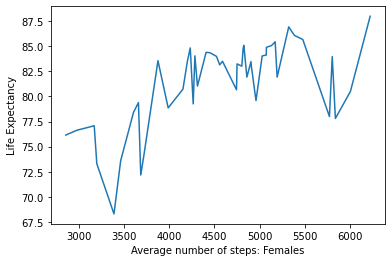

In [62]:
ax = sns.lineplot(data=gender_steps_females, x='steps_female', y='life expectancy')
ax.set(xlabel='Average number of steps: Females', ylabel='Life Expectancy')
plt.show()

The new data does prove a moderate correlation between women's life span and walking. What about men?

In [63]:
gender_steps_males['steps_male'].corr(gender_steps_males['life expectancy'])

0.49452937215393433

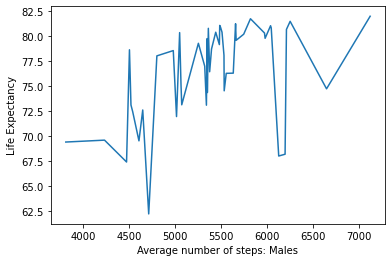

In [64]:
ax = sns.lineplot(data=gender_steps_males, x='steps_male', y='life expectancy')
ax.set(xlabel='Average number of steps: Males', ylabel='Life Expectancy')
plt.show()

In the male case, there is a fair correlation. There are some exceptions from the general direction. If they didn't exist, the results would be more promising.

The new dataset makes the <b> relationship between long life and walking clearer</b>. Women's life span begins to rise gradually over 4000 steps, men's - over 5000 steps. Even though there are outliers, steps over 5700 seem to reach the peak in the male case. However, in the female case, the peak is reached over 6000 steps. 

These results support to some extent the study, cited earlier, that the optimal walk is between 7000 and 9999 steps [[2]](#Cell2).

The new dataset proves that there is a closer relationship between longevity and walking in the female case (in comparison with the male case)  - similarly to the study, cited in the introduction [[4]](#Cell4)</b>.
Generally, women walk less than men almost everywhere. And this is visible from the data used.

In [65]:
gender_gap = gender_steps.melt(id_vars=["country", "gender", "life expectancy"], var_name="steps-gender", value_name="steps")[["country", "steps-gender", "steps"]]

In [66]:
gender_gap.drop_duplicates(keep='first',inplace=True)

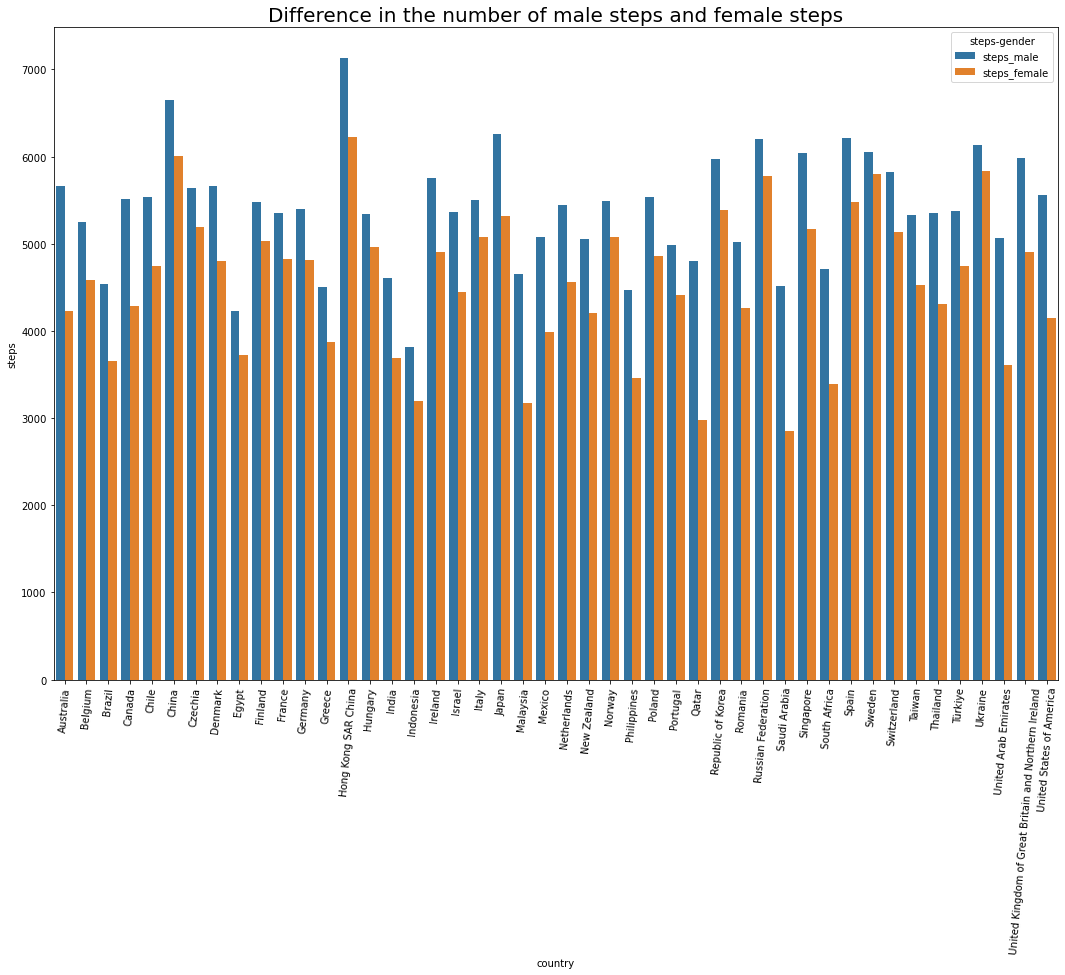

In [67]:
plt.figure(figsize = (18, 12))
sns.barplot(x='country', y='steps', hue='steps-gender', data=gender_gap.sort_values("country", ascending = True))
plt.title("Difference in the number of male steps and female steps", fontsize = 20)
plt.xticks(rotation=85)
plt.show()

Regarding this tight connection of women's life span with walking, it turns out that <b>walking could have strong potential power to make women's lives longer. Something, that obviously (visible on the graph) is not fully harnessed today</b>. 

The reason for this potential could be hidden in the sex hormone estrogen. It protects a woman's body against heart diseases. During and after menopause, the estrogen levels drop and women become exposed to a higher risk of cardiovascular diseases [[19]](#Cell19). "During the 10 years after menopause, the risk of stroke roughly doubles in women" [[20]](#Cell20). But exactly here lies one of the greatest strengths of physical activity. It prevents people from cardiovascular diseases in many different ways [[21]](#Cell21). 

##### Prediction

Since there is a connection between walking and women's health, we can try to make predictions for a woman's life on the base of her number of daily steps.

In [68]:
x = gender_steps_females['steps_female'] 
y = gender_steps_females['life expectancy']
woman_with_5000_steps_ski = prediction_ski([[5000]], x, y)
woman_with_7000_steps_ski = prediction_ski([[7000]], x, y)
woman_with_10000_steps_ski = prediction_ski([[10000]], x, y)
woman_with_12000_steps_ski = prediction_ski([[12000]], x, y)


print(f"Predicted life expectancy of a woman, who walks 5000 steps daily: {woman_with_5000_steps_ski} years.")
print(f"Predicted life expectancy of a woman, who walks 7000 steps daily: {woman_with_7000_steps_ski} years.")
print(f"Predicted life expectancy of a woman, who walks 10000 steps daily: {woman_with_10000_steps_ski} years.")
print(f"Predicted life expectancy of a woman, who walks 12000 steps daily: {woman_with_12000_steps_ski} years.")

Predicted life expectancy of a woman, who walks 5000 steps daily: 82.83 years.
Predicted life expectancy of a woman, who walks 7000 steps daily: 89.52 years.
Predicted life expectancy of a woman, who walks 10000 steps daily: 99.56 years.
Predicted life expectancy of a woman, who walks 12000 steps daily: 106.26 years.


For a man the results will be:

In [69]:
x = gender_steps_males['steps_male'] 
y = gender_steps_males['life expectancy']
man_with_5000_steps_ski = prediction_ski([[5000]], x, y)
man_with_7000_steps_ski = prediction_ski([[7000]], x, y)
man_with_10000_steps_ski = prediction_ski([[10000]], x, y)
man_with_12000_steps_ski = prediction_ski([[12000]], x, y)

print(f"Predicted life expectancy of a man, who walks 5000 steps daily: {man_with_5000_steps_ski} years.")
print(f"Predicted life expectancy of a man, who walks 7000 steps daily: {man_with_7000_steps_ski} years.")
print(f"Predicted life expectancy of a man, who walks 10000 steps daily: {man_with_10000_steps_ski} years.")
print(f"Predicted life expectancy of a man, who walks 12000 steps daily: {man_with_12000_steps_ski} years.")

Predicted life expectancy of a man, who walks 5000 steps daily: 75.06 years.
Predicted life expectancy of a man, who walks 7000 steps daily: 82.36 years.
Predicted life expectancy of a man, who walks 10000 steps daily: 93.31 years.
Predicted life expectancy of a man, who walks 12000 steps daily: 100.61 years.


#### Comparison By Walking

In order to support the correlation above and to include other kinds of physical activities, we are going to use data of Eurostat. The most up-to-date information is from 2019. It shows the percentage of Europeans by country "reporting doing non-work-related physical activities at least once a week. Physical activities included are sports, cycling to get to and from places, walking to get to and from places and muscle strengthening activities" [[22]](#Cell22). Dataset source: [[23]](#Cell23) (used here from a local folder). This data covers all age groups and both genders.

Eurostat data, as a big part of data today, is collected through surveys (questionnaires). Because of its nature, it is possible not to be very accurate in comparison with the data, analyzed so far. This warning can be found in the information about Eurostat data sources for physical activity: "The indicators presented in this article are derived from self-reported data. Therefore, they are to a certain extent affected by respondents’ subjective perception as well as by their social and cultural background." [[24]](#Cell24) 

In [70]:
eurostat_data = pd.read_csv("datasets/eurostat.csv")

In [71]:
eurostat_data["ISCED11"].unique()

array(['All ISCED 2011 levels ',
       'Less than primary, primary and lower secondary education (levels 0-2)',
       'Upper secondary and post-secondary non-tertiary education (levels 3 and 4)',
       'Tertiary education (levels 5-8)'], dtype=object)

##### Data Tidying and Cleaning

- Let`s filter out the total for European Union data and leave the information about the European countries and Turkey in.

In [72]:
eurostat_data = eurostat_data[(eurostat_data["GEO"] != "European Union - 27 countries (from 2020)") & (eurostat_data["GEO"] != "European Union - 28 countries (2013-2020)")]

 - We will leave out some unnecessary information (columns "UNIT", "TIME", "ISCED11", and "Flag and Footnotes") as well as the raws concerning International Standard Classification of Education (ISCED) details.

In [73]:
eurostat_data = eurostat_data[eurostat_data["ISCED11"] == "All ISCED 2011 levels "]

In [74]:
eurostat_data = eurostat_data.drop(columns = ["UNIT", "TIME", "ISCED11", "Flag and Footnotes"])

In [75]:
eurostat_data.Value.dtype

dtype('O')

The column with percentages ("Value") is object type (string). It should be transformed into float type so that we can use it for comparisons. The problem is that here we have empty cells (no data, denoted by ":") for some of the age groups and for all the information concerning the United Kingdom. We will delete the rows with UK missing data.

In [76]:
eurostat_data[eurostat_data["GEO"] == "United Kingdom"].Value.unique()

array([':'], dtype=object)

In [77]:
eurostat_data = eurostat_data[eurostat_data["GEO"] != "United Kingdom"]

In [78]:
eurostat_data

,PHYSACT,GEO,SEX,AGE,Value
504,Walking to get to and from place,Belgium,Total,Total,76.9
505,Walking to get to and from place,Belgium,Total,From 15 to 19 years,88.6
506,Walking to get to and from place,Belgium,Total,From 15 to 24 years,83.7
507,Walking to get to and from place,Belgium,Total,From 15 to 29 years,83.2
508,Walking to get to and from place,Belgium,Total,From 15 to 64 years,79.0
...,...,...,...,...,...
34078,Muscle-strengthening,Turkey,Females,From 45 to 64 years,1.3
34079,Muscle-strengthening,Turkey,Females,From 55 to 64 years,1.1
34080,Muscle-strengthening,Turkey,Females,From 65 to 74 years,0.7
34081,Muscle-strengthening,Turkey,Females,65 years or over,0.9


In [79]:
null_values = eurostat_data[eurostat_data["Value"] == ":"]

In [80]:
len(null_values.AGE.unique())

21

In [81]:
len(eurostat_data.AGE.unique())

21

It turns out that any of the age groups in some countries has missing data, which makes our job more difficult. We are going to delete the rows with empty values so that when we merge the table with that of WHO, these values are going to miss (we won`t use age groups a lot).

In [82]:
eurostat_data = eurostat_data.drop(null_values.index)

We are ready to change the Value type to float

In [83]:
eurostat_data.Value = eurostat_data.Value.astype(float)

Because we saw a different correlation between women's and men's life spans and steps, we going to prepare the table for gender analysis.

In [84]:
eurostat_data

,PHYSACT,GEO,SEX,AGE,Value
504,Walking to get to and from place,Belgium,Total,Total,76.9
505,Walking to get to and from place,Belgium,Total,From 15 to 19 years,88.6
506,Walking to get to and from place,Belgium,Total,From 15 to 24 years,83.7
507,Walking to get to and from place,Belgium,Total,From 15 to 29 years,83.2
508,Walking to get to and from place,Belgium,Total,From 15 to 64 years,79.0
...,...,...,...,...,...
34078,Muscle-strengthening,Turkey,Females,From 45 to 64 years,1.3
34079,Muscle-strengthening,Turkey,Females,From 55 to 64 years,1.1
34080,Muscle-strengthening,Turkey,Females,From 65 to 74 years,0.7
34081,Muscle-strengthening,Turkey,Females,65 years or over,0.9


In [85]:
females_eurostat = eurostat_data[eurostat_data["SEX"] == "Females"]

In [86]:
females_eurostat.head()

,PHYSACT,GEO,SEX,AGE,Value
546,Walking to get to and from place,Belgium,Females,Total,76.4
547,Walking to get to and from place,Belgium,Females,From 15 to 19 years,89.9
548,Walking to get to and from place,Belgium,Females,From 15 to 24 years,86.1
549,Walking to get to and from place,Belgium,Females,From 15 to 29 years,85.1
550,Walking to get to and from place,Belgium,Females,From 15 to 64 years,79.2


In [87]:
males_eurostat = eurostat_data[eurostat_data["SEX"] == "Males"]

In [88]:
males_eurostat.head()

,PHYSACT,GEO,SEX,AGE,Value
525,Walking to get to and from place,Belgium,Males,Total,77.4
526,Walking to get to and from place,Belgium,Males,From 15 to 19 years,87.2
527,Walking to get to and from place,Belgium,Males,From 15 to 24 years,81.4
528,Walking to get to and from place,Belgium,Males,From 15 to 29 years,81.3
529,Walking to get to and from place,Belgium,Males,From 15 to 64 years,78.7


Let's merge the WHO 2019 dataset, separated by genders, with the new two tables, based on the Eurostat data.

In [89]:
female_lifespan = life_span[(life_span["year"] == 2019) & (life_span["gender"] == "Female")]

In [90]:
male_lifespan = life_span[(life_span["year"] == 2019) & (life_span["gender"] == "Male")]

In [91]:
female_eurostat_lifespan = females_eurostat.merge(female_lifespan, left_on="GEO", right_on="country")

In [92]:
female_eurostat_lifespan

,PHYSACT,GEO,SEX,AGE,Value,country,year,gender,life expectancy
0,Walking to get to and from place,Belgium,Females,Total,76.4,Belgium,2019,Female,83.51
1,Walking to get to and from place,Belgium,Females,From 15 to 19 years,89.9,Belgium,2019,Female,83.51
2,Walking to get to and from place,Belgium,Females,From 15 to 24 years,86.1,Belgium,2019,Female,83.51
3,Walking to get to and from place,Belgium,Females,From 15 to 29 years,85.1,Belgium,2019,Female,83.51
4,Walking to get to and from place,Belgium,Females,From 15 to 64 years,79.2,Belgium,2019,Female,83.51
...,...,...,...,...,...,...,...,...,...
2165,Muscle-strengthening,Serbia,Females,From 45 to 64 years,2.0,Serbia,2019,Female,78.28
2166,Muscle-strengthening,Serbia,Females,From 55 to 64 years,1.5,Serbia,2019,Female,78.28
2167,Muscle-strengthening,Serbia,Females,From 65 to 74 years,2.5,Serbia,2019,Female,78.28
2168,Muscle-strengthening,Serbia,Females,65 years or over,2.0,Serbia,2019,Female,78.28


In [93]:
male_eurostat_lifespan = males_eurostat.merge(male_lifespan, left_on="GEO", right_on="country")

In [94]:
male_eurostat_lifespan

,PHYSACT,GEO,SEX,AGE,Value,country,year,gender,life expectancy
0,Walking to get to and from place,Belgium,Males,Total,77.4,Belgium,2019,Male,79.29
1,Walking to get to and from place,Belgium,Males,From 15 to 19 years,87.2,Belgium,2019,Male,79.29
2,Walking to get to and from place,Belgium,Males,From 15 to 24 years,81.4,Belgium,2019,Male,79.29
3,Walking to get to and from place,Belgium,Males,From 15 to 29 years,81.3,Belgium,2019,Male,79.29
4,Walking to get to and from place,Belgium,Males,From 15 to 64 years,78.7,Belgium,2019,Male,79.29
...,...,...,...,...,...,...,...,...,...
2168,Muscle-strengthening,Serbia,Males,From 45 to 64 years,4.0,Serbia,2019,Male,73.46
2169,Muscle-strengthening,Serbia,Males,From 55 to 64 years,2.1,Serbia,2019,Male,73.46
2170,Muscle-strengthening,Serbia,Males,From 65 to 74 years,2.8,Serbia,2019,Male,73.46
2171,Muscle-strengthening,Serbia,Males,65 years or over,2.5,Serbia,2019,Male,73.46


In [95]:
female_eurostat_lifespan["year"].isna().any()

False

In [96]:
male_eurostat_lifespan["year"].isna().any()

False

##### Analysis

In [97]:
female_eurostat_lifespan["Value"].corr(female_eurostat_lifespan["life expectancy"])

0.06460626973836957

In [98]:
male_eurostat_lifespan["Value"].corr(male_eurostat_lifespan["life expectancy"])

0.059371022312570625

There is no correlation between all kinds of physical activities and life span in both cases.

Let's see if there is some correlation with walking.

In [99]:
female_eurostat_lifespan["PHYSACT"].unique()

array(['Walking to get to and from place',
       'Cycling to get to and from place', 'Aerobic sports',
       'Muscle-strengthening'], dtype=object)

In [100]:
f_walk = female_eurostat_lifespan[female_eurostat_lifespan["PHYSACT"] == "Walking to get to and from place"]

In [101]:
m_walk = male_eurostat_lifespan[male_eurostat_lifespan["PHYSACT"] == "Walking to get to and from place"]

In [102]:
f_walk["Value"].corr(f_walk["life expectancy"])

-0.41142112095769384

In [103]:
m_walk["Value"].corr(m_walk["life expectancy"])

-0.399654403052368

Having in mind, that walking to a place once a week is something common for people, it is not surprising that it doesn't show a relationship with the life span. Moreover, the fair correlation here is inverse. It means that the small group of people who don't go on foot to a place once a week maybe lives longer. These small groups, logically, could be people with disabilities (because of advanced age). Let's test this assumption with the female group (that usually lives longer). The aim is to find out if we filter out people over 65, whether data would be more correlated to life span.

In [104]:
f_walk["AGE"].unique()

array(['Total', 'From 15 to 19 years', 'From 15 to 24 years',
       'From 15 to 29 years', 'From 15 to 64 years',
       'From 18 to 24 years', 'From 18 to 29 years',
       'From 18 to 64 years', '18 years or over', 'From 20 to 24 years',
       'From 25 to 29 years', 'From 25 to 34 years',
       'From 35 to 44 years', 'From 45 to 54 years',
       'From 45 to 64 years', 'From 55 to 64 years',
       'From 65 to 74 years', '65 years or over', '75 years or over'],
      dtype=object)

In [105]:
f_walk_older = f_walk[(f_walk["AGE"] != "75 years or over") & (f_walk["AGE"] != "Total") & (f_walk["AGE"] != "18 years or over") & (f_walk["AGE"] != "From 65 to 74 years") & (f_walk["AGE"] != "65 years or over") & (f_walk["AGE"] != "75 years or over")]

In [106]:
f_walk_older["Value"].corr(f_walk_older["life expectancy"])

-0.4415638155797427

Our assumption is not correct. Let's see which countries have bigger groups of people who do not walk at least once a week. In order to get a clean table, we will use only the "Total" age group.

In [107]:
f_walk_by_country = f_walk.sort_values("Value", ascending=True)

In [108]:
f_walk_by_country = f_walk_by_country[f_walk_by_country["AGE"] == "Total"]

In [109]:
f_walk_by_country.head(10)

,PHYSACT,GEO,SEX,AGE,Value,country,year,gender,life expectancy
836,Walking to get to and from place,Cyprus,Females,Total,14.3,Cyprus,2019,Female,85.12
1942,Walking to get to and from place,Iceland,Females,Total,55.3,Iceland,2019,Female,83.87
1505,Walking to get to and from place,Portugal,Females,Total,67.1,Portugal,2019,Female,84.40
760,Walking to get to and from place,Italy,Females,Total,71.3,Italy,2019,Female,84.90
1201,Walking to get to and from place,Malta,Females,Total,72.2,Malta,2019,Female,83.80
2018,Walking to get to and from place,Norway,Females,Total,73.2,Norway,2019,Female,84.13
0,Walking to get to and from place,Belgium,Females,Total,76.4,Belgium,2019,Female,83.51
1277,Walking to get to and from place,Netherlands,Females,Total,79.4,Netherlands,2019,Female,83.15
608,Walking to get to and from place,France,Females,Total,81.4,France,2019,Female,85.09
456,Walking to get to and from place,Greece,Females,Total,81.8,Greece,2019,Female,83.57


In [110]:
m_walk_by_country = m_walk.sort_values("Value", ascending=True)

In [111]:
m_walk_by_country = m_walk_by_country[m_walk_by_country["AGE"] == "Total"]

In [112]:
m_walk_by_country.head(10)

,PHYSACT,GEO,SEX,AGE,Value,country,year,gender,life expectancy
836,Walking to get to and from place,Cyprus,Males,Total,13.1,Cyprus,2019,Male,81.12
1945,Walking to get to and from place,Iceland,Males,Total,51.7,Iceland,2019,Male,80.81
1508,Walking to get to and from place,Portugal,Males,Total,69.4,Portugal,2019,Male,78.56
2021,Walking to get to and from place,Norway,Males,Total,69.5,Norway,2019,Male,81.08
1280,Walking to get to and from place,Netherlands,Males,Total,71.4,Netherlands,2019,Male,80.40
1204,Walking to get to and from place,Malta,Males,Total,73.0,Malta,2019,Male,79.94
760,Walking to get to and from place,Italy,Males,Total,73.8,Italy,2019,Male,80.91
304,Walking to get to and from place,Estonia,Males,Total,76.5,Estonia,2019,Male,74.70
0,Walking to get to and from place,Belgium,Males,Total,77.4,Belgium,2019,Male,79.29
976,Walking to get to and from place,Lithuania,Males,Total,81.4,Lithuania,2019,Male,71.23


We can notice that the first countries with bigger groups of non-walking people(men and women) are those from countries like Cyprus, Portugal, Malta, and Italy, and from countries like Iceland, Norway, and Netherlands - countries with hot and cold climates. Cyprus and Iceland are even outliers (in the both gender cases).

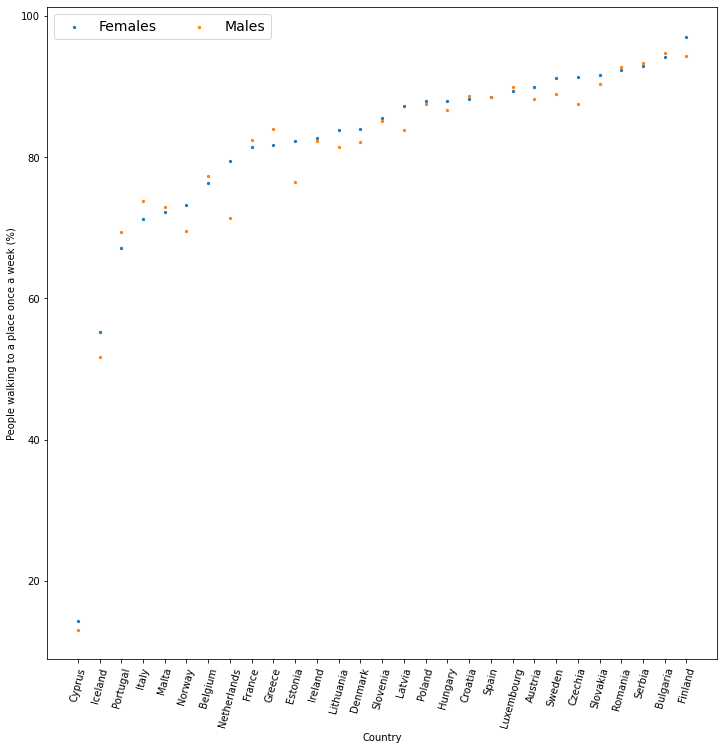

In [113]:
plt.figure(figsize = (12, 12))
females_scatter = plt.scatter(f_walk_by_country["country"], f_walk_by_country["Value"], s=5)
males_scatter = plt.scatter(m_walk_by_country["country"], m_walk_by_country["Value"], s=5)
plt.xlabel("Country")
plt.ylabel("People walking to a place once a week (%)")
plt.xticks(rotation=75)
plt.legend((females_scatter, males_scatter),
           ('Females', 'Males'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=14)
plt.show()

The surprise here is that in quite a lot of countries the group of "walking" women is bigger than that of men. Another surprise is Finland, a country with a cold climate - the leading country in the percentage of women walking at least once a week and second after Bulgaria for the group of men. Despite this country's results, let's check the climate assumption, leaving out the big outliers (Cyprus and Iceland).

In [114]:
f_walk_by_country_without_outliers = f_walk_by_country[(f_walk_by_country["country"] != "Cyprus") & (f_walk_by_country["country"] != "Iceland")]

In [115]:
m_walk_by_country_without_outliers = m_walk_by_country[(m_walk_by_country["country"] != "Cyprus") & (m_walk_by_country["country"] != "Iceland")]

In [116]:
f_walk_by_country_without_outliers["Value"].corr(f_walk_by_country_without_outliers["life expectancy"])

-0.4807586828029462

In [117]:
m_walk_by_country_without_outliers["Value"].corr(m_walk_by_country_without_outliers["life expectancy"])

-0.40591185495506366

Still the results of both genders show a fair inverse correlation. 

Eurostat walking data is quite general and not so closely connected to our goal as the steps data, since we want to find out how much time of physical activity is needed for longer life. Moreover, it is based on self-reports (and not accelerometer-defined measures as in the steps dataset).

We will check the other kinds of physical activities from the Eurostat data in order to find if they have a relationshop with life span. Since walking to get to a place once a week is a widely-practiced activity, cycling, aerobic sports and especially muscle-strengthening need some equipment or some time devoted to exercise. So we can expect more reliable self-assessment, self-reporting, and therefore, data.

### Cycling

We will continue the analysis with the female and male cycling "to get to or from a place" once a week. This definition implies some need to get somewhere rather than do it for pure pleasure (or longer life ;) ). Therefore it is the closest category to "Walking to get to and from place" once a week and we can't expect much better results. That's why we will include some more data from other sources here.

In [118]:
female_eurostat_lifespan

,PHYSACT,GEO,SEX,AGE,Value,country,year,gender,life expectancy
0,Walking to get to and from place,Belgium,Females,Total,76.4,Belgium,2019,Female,83.51
1,Walking to get to and from place,Belgium,Females,From 15 to 19 years,89.9,Belgium,2019,Female,83.51
2,Walking to get to and from place,Belgium,Females,From 15 to 24 years,86.1,Belgium,2019,Female,83.51
3,Walking to get to and from place,Belgium,Females,From 15 to 29 years,85.1,Belgium,2019,Female,83.51
4,Walking to get to and from place,Belgium,Females,From 15 to 64 years,79.2,Belgium,2019,Female,83.51
...,...,...,...,...,...,...,...,...,...
2165,Muscle-strengthening,Serbia,Females,From 45 to 64 years,2.0,Serbia,2019,Female,78.28
2166,Muscle-strengthening,Serbia,Females,From 55 to 64 years,1.5,Serbia,2019,Female,78.28
2167,Muscle-strengthening,Serbia,Females,From 65 to 74 years,2.5,Serbia,2019,Female,78.28
2168,Muscle-strengthening,Serbia,Females,65 years or over,2.0,Serbia,2019,Female,78.28


In [119]:
females_cycling = female_eurostat_lifespan[female_eurostat_lifespan["PHYSACT"] == "Cycling to get to and from place"]

In [120]:
females_cycling

,PHYSACT,GEO,SEX,AGE,Value,country,year,gender,life expectancy
19,Cycling to get to and from place,Belgium,Females,Total,26.3,Belgium,2019,Female,83.51
20,Cycling to get to and from place,Belgium,Females,From 15 to 19 years,36.3,Belgium,2019,Female,83.51
21,Cycling to get to and from place,Belgium,Females,From 15 to 24 years,36.5,Belgium,2019,Female,83.51
22,Cycling to get to and from place,Belgium,Females,From 15 to 29 years,28.3,Belgium,2019,Female,83.51
23,Cycling to get to and from place,Belgium,Females,From 15 to 64 years,27.9,Belgium,2019,Female,83.51
...,...,...,...,...,...,...,...,...,...
2127,Cycling to get to and from place,Serbia,Females,From 45 to 64 years,21.1,Serbia,2019,Female,78.28
2128,Cycling to get to and from place,Serbia,Females,From 55 to 64 years,21.0,Serbia,2019,Female,78.28
2129,Cycling to get to and from place,Serbia,Females,From 65 to 74 years,13.2,Serbia,2019,Female,78.28
2130,Cycling to get to and from place,Serbia,Females,65 years or over,9.0,Serbia,2019,Female,78.28


In [121]:
males_cycling = male_eurostat_lifespan[male_eurostat_lifespan["PHYSACT"] == "Cycling to get to and from place"]

In [122]:
males_cycling

,PHYSACT,GEO,SEX,AGE,Value,country,year,gender,life expectancy
19,Cycling to get to and from place,Belgium,Males,Total,32.8,Belgium,2019,Male,79.29
20,Cycling to get to and from place,Belgium,Males,From 15 to 19 years,39.5,Belgium,2019,Male,79.29
21,Cycling to get to and from place,Belgium,Males,From 15 to 24 years,43.5,Belgium,2019,Male,79.29
22,Cycling to get to and from place,Belgium,Males,From 15 to 29 years,38.2,Belgium,2019,Male,79.29
23,Cycling to get to and from place,Belgium,Males,From 15 to 64 years,32.8,Belgium,2019,Male,79.29
...,...,...,...,...,...,...,...,...,...
2130,Cycling to get to and from place,Serbia,Males,From 45 to 64 years,27.7,Serbia,2019,Male,73.46
2131,Cycling to get to and from place,Serbia,Males,From 55 to 64 years,26.6,Serbia,2019,Male,73.46
2132,Cycling to get to and from place,Serbia,Males,From 65 to 74 years,23.4,Serbia,2019,Male,73.46
2133,Cycling to get to and from place,Serbia,Males,65 years or over,20.7,Serbia,2019,Male,73.46


In [123]:
females_cycling["Value"].corr(females_cycling["life expectancy"])

-0.08388233865143824

Female cycling, according to Eurostat data, has nothing to do with the female life span. Because there is an overlapping of some age groups (like "From 18 to 64 years" and "18 years or over" or
"From 65 to 74 years" and "65 years or over") we can focus on the total number (all-age group).

In [124]:
females_cycling_total = females_cycling[females_cycling["AGE"] == "Total"]

In [125]:
females_cycling_total["Value"].corr(females_cycling_total["life expectancy"])

-0.06173185115626157

There is still no correlation. Let's see what the numbers for male cycling say.

In [126]:
males_cycling["Value"].corr(males_cycling["life expectancy"])

-0.06582588752624052

In [127]:
males_cycling_total = males_cycling[males_cycling["AGE"] == "Total"]

In [128]:
males_cycling_total["Value"].corr(males_cycling_total["life expectancy"])

-0.046136197348591645

We get the same results. According to this data in both cases to ride a bike once a week is not something that will make your life longer. 

But what about every day - to the workplace and back?  

The answers come from a meta-analysis. The results of a systematic review of 9 articles (17 studies) with 478,847 participants and 27,860 cases (22,415 from all-cause mortality and 5445 from CVD mortality) show that all-cause mortality was reduced 23% with the highest versus lowest cycling level and CVD (Cardiovascular Diseases) mortality was reduced 24% ("a 40% lower mortality rate corresponds to an approximately 5-year higher life expectancy"). <b>The approximate optimum for CVD mortality (still the leading cause of death) is about 150 minutes of cycling per week</b> [[25]](#Cell25). This is about <b>20-25 minutes per day</b>.

This seems as the same time that people from three of the leading countries in cycling (Netherlands, Japan, and Germany) spend riding a bike (the median duration of cycle trips is about 10 minutes and the median distance of cycle trips is about 2 km per trip; going to work is categorized as one trip, going back home as another) [[26]](#Cell26).
So, if we love cycling, we can add 2-3 years to our lives (40%*x = 5 (years) -> 0.40*x = 5, x = 12.5; 23% reduced mortality -> 0.23*12.5=2.88).

According to this research (the actual research is mentioned in the source) [[3]](#Cell3) (the table, concerning former athletes' life span) the participants of Tour de France live 8 years longer. Just in case somebody has time for long-distance riding, a professional cyclist pedals 2 hours per day and covers about 60 km. per day (22,106 km per year) [[27]](#Cell27). Therefore his speed is about 30km/h - a great challenge for 
a beginner cyclist and even for an intermediate one [[30]](#Cell30).

So, we have some results already. <b>The optimum is about 70 minutes walking or 20-25 minutes of riding a bike. The longer the physical activity (and the faster), the better</b>.

### Other Physical Activities

Now we are going to analyze the research, already mentioned in our introduction [[3]](#Cell3). Because its table is in the form of png files, and the whole article is published in pdf format, we will import and order the table files in the way they are found in the whole article (the pdf file). In the pdf paper, there is a page with part of the table that is not uploaded to the source of the other files. So we converted that part into an image(jpg file) and downloaded it. In order for all files to be similar, other downloaded files format is also converted to jpg. All these files can be found in the "meta-analysis" folder. There is one more file among the downloaded, that shows a different table, concerning the life span of former athletes (this data was mentioned above). Because it will be our starting point, it will be transformed first. Let's import the images.

In [129]:
former_athletes_page = skimage.io.imread("datasets\meta-analysis\images\Case-control-studies-presenting-life-expectancy-of-former-athletes-compared-to-that.jpg")

In [130]:
page1 = skimage.io.imread("datasets\meta-analysis\images\Cohort-studies-comparing-the-life-expectancy-of-physically-active-and-inactive-persons.jpg")
page2 = skimage.io.imread("datasets\meta-analysis\images\Continued_2.jpg")
page3 = skimage.io.imread("datasets\meta-analysis\images\missing.jpg")
page4 = skimage.io.imread("datasets\meta-analysis\images\Continued.jpg")

#### Data Tidying and Cleaning

  - Make them grey in order to resize them after that:

In [131]:
page_athletes= convert_to_grayscale([former_athletes_page])[0]

In [132]:
page1_gray, page2_gray, page3_gray, page4_gray  = convert_to_grayscale([page1, page2, page3, page4])

 - We should rotate the images (but not page_athletes):

In [133]:
page1_rot, page2_rot, page3_rot, page4_rot  = rotate_images([page1_gray, page2_gray, page3_gray, page4_gray])

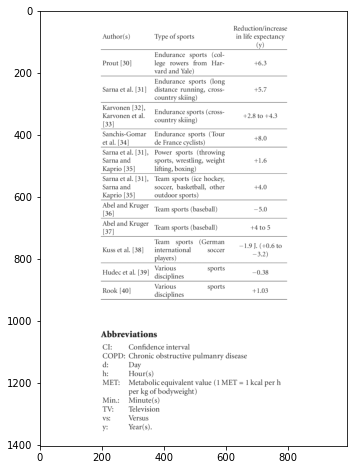

In [134]:
show_images([page_athletes])

 - The bottom of this page is not part of the table, we need to crop it. We will crop the space as well.

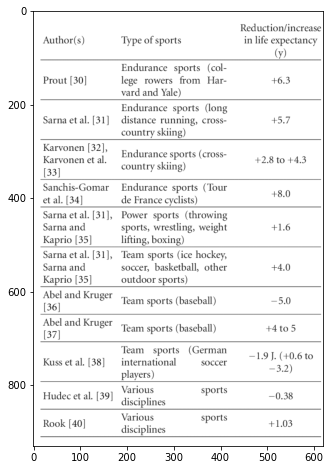

In [135]:
page_atheletes_cropped = crop_image(page_athletes, 20, 950, 180, 800)
show_images([page_atheletes_cropped])

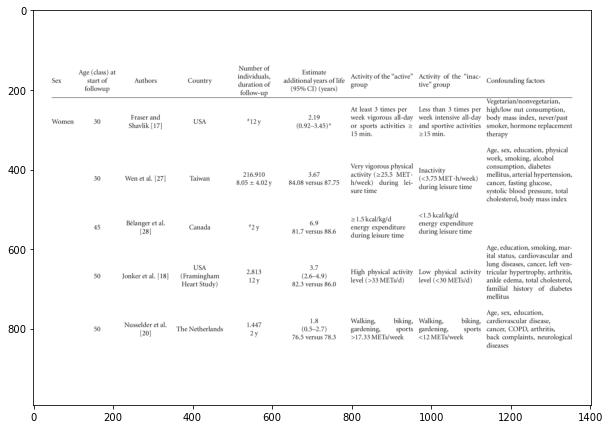

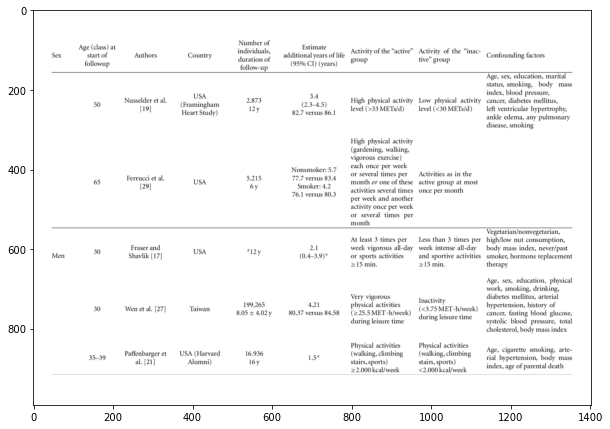

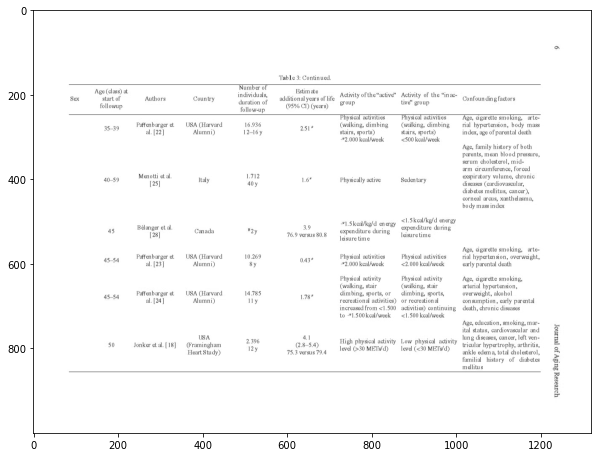

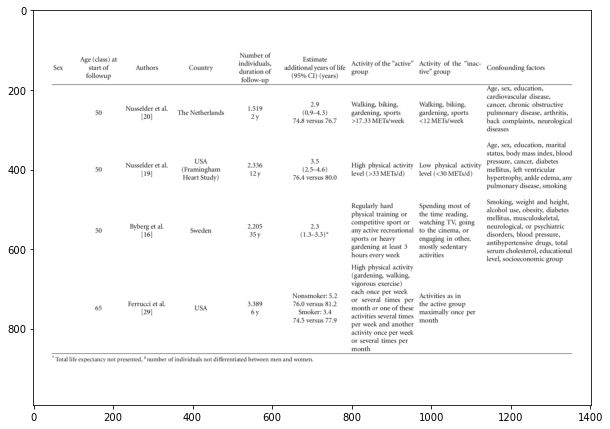

In [136]:
show_images([page1_rot, page2_rot, page3_rot, page4_rot])

- We see that every file has column names. When we merge the files, they will not be necessary anymore. We should crop them.

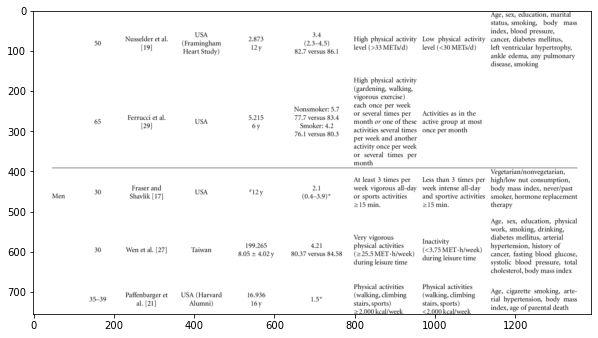

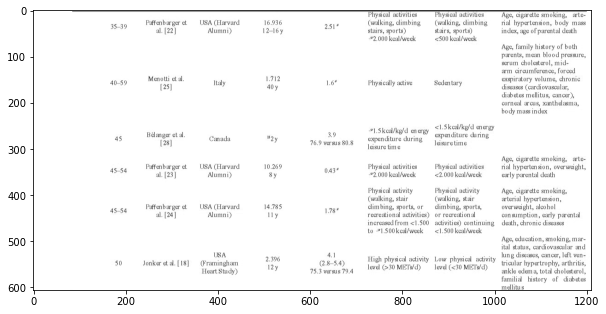

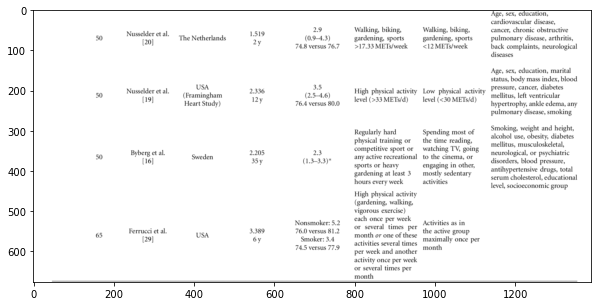

In [137]:
page2_rot = crop_image(page2_rot, 155, 910, 0, 1390)
page3_rot = crop_image(page3_rot, 244, 850, 0, 1210)
page4_rot = crop_image(page4_rot, 188, 865, 0, 1390)
show_images([page2_rot, page3_rot, page4_rot])

- We will concatenate the four files, that form the whole table, but before that, because of their different width, we should make them the same size.

In [138]:
combined_image = concatenate_images([page1_rot, page2_rot, page3_rot, page4_rot])
concatenate_images([page1_rot, page2_rot, page3_rot, page4_rot])

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

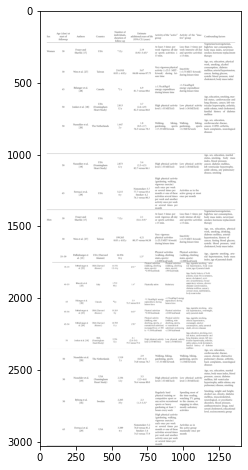

In [139]:
show_images([combined_image])

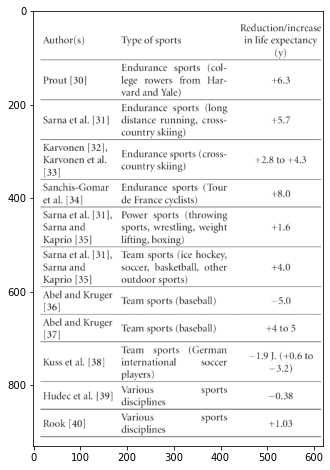

In [140]:
cleaned_page_athletes = threshold_image(page_atheletes_cropped, low = 50, high = 200)
show_images([cleaned_page_athletes])

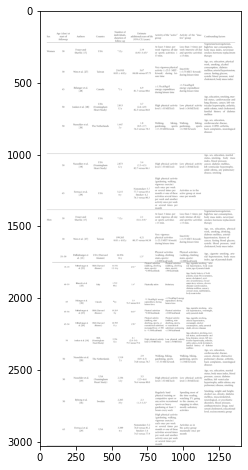

In [141]:
cleaned_image = threshold_image(combined_image, low = 50, high = 200)
show_images([cleaned_image])

In [142]:
cleaned_page_athletes = cleaned_page_athletes.astype("uint8")

In [143]:
cleaned_image = cleaned_image.astype("uint8")

In [144]:
if not os.path.exists("output"):
    os.makedirs("output")
skimage.io.imsave("output/table_athletes.jpg", cleaned_page_athletes)

In [145]:
# if not os.path.exists("output"):
#     os.makedirs("output")
skimage.io.imsave("output/table.jpg", cleaned_image)

Because the document consists of text blocks, and Tesseract reads the file horizontally, the text is messy. With commands "tesseract table_athletes.jpg table_athletes -l eng --oem 3 --psm 12" and "tesseract table.jpg table -l eng --oem 3 --psm 12" we get a little better results. Let's see the first lines of former athletes content:

In [146]:
table_athletes_messy_content = ""
with open ("output/table_athletes.txt", encoding="utf8") as file:
    table_athletes_messy_content = file.read()
print(table_athletes_messy_content[0:250])

Reduction/increase

Author(s)

Type of sports

in life expectancy

07)

Endurance sports (col-

Prout [30]

lege rowers from Har-

+6.3

vard and Yale)

Endurance sports (long

Sarna et al. [31]

distance running, cross-

+5.7

country skiing)

Karvo


The first lines of the other table`s content:

In [147]:
table_messy_content = ""
with open ("output/table.txt", encoding="utf8") as file:
    table_messy_content = file.read()
print(table_messy_content[0:250])

Number of

Estimate

Age (class) at

individuals,

Activity of the “active”

Activity of the “inac-

Sex

start of

Authors

Country

duration of

additional years of life

Confounding factors

followup

(95% CI) (years)

roup

tive” group

follow-up


---

After editing the documents, we have much clear content.

In [148]:
table_athletes = ""
with open ("output/table_athletes_edited.txt", encoding="utf8") as file:
    table_athletes = file.read()
print(table_athletes[0:255])

Author(s)

Prout [30]

Sarna et al. [31]

Karvonen [32],
Karvonen et al.
[33]

Sanchis-Gomar
et al. [34]

Sarna et al. [31],
Sarna and
Kaprio [35]

Sarna et al. [31],
Sarna and
Kaprio [35]

Abel and Kruger
[36]

Abel and Kruger
[37]

Kuss et al. [38]

Hud


In [149]:
table_content = ""
with open ("output/table_edited.txt", encoding="utf8") as file:
    table_content = file.read()
print(table_content[0:255])

---

Sex

Women

Women

Women

Women

Women

Women

Women

Men

Men 

Men

Men

Men

Men

Men

Men

Men

Men

Men

Men

Men

---

Age (class) at
start of
followup

30

30

45

50

50

50

65

30

30

35-39

35-39

40-59

45

45-54

45-54

50

50

50

50




Now we are going to fill in the two tables with the information.

In [150]:
# Get the names of the columns. Before each name we wrote "---"
table_athletes_list = table_athletes.split("---")
table_content_list = table_content.split("---")

In [151]:
table_athletes_list = remove_empty_elements(table_athletes_list)
table_content_list = remove_empty_elements(table_content_list)

In [152]:
# Between the entries in the columns there are two empty lines. We can use them to seperate the rows of columns.
ready_athletes = [entry.split("\n\n") for entry in table_athletes_list]        
ready_content = [entry.split("\n\n") for entry in table_content_list]        

In [153]:
ready_athletes = remove_empty_entries_and_lines(ready_athletes)
ready_content_new = remove_empty_entries_and_lines(ready_content)

 - Sometimes the code above is not executed, that's why the functuon is called twice

In [154]:
ready_athletes = remove_empty_entries_and_lines(ready_athletes)
ready_content_new = remove_empty_entries_and_lines(ready_content)

In [155]:
ready_athletes

[['Author(s)',
  'Prout [30]',
  'Sarna et al. [31]',
  'Karvonen [32], Karvonen et al. [33]',
  'Sanchis-Gomar et al. [34]',
  'Sarna et al. [31], Sarna and Kaprio [35]',
  'Sarna et al. [31], Sarna and Kaprio [35]',
  'Abel and Kruger [36]',
  'Abel and Kruger [37]',
  'Kuss et al. [38]',
  'Hudec et al. [39]',
  'Rook [40] '],
 [' Type of sports',
  'Endurance sports (col- lege rowers from Har- vard and Yale)',
  'Endurance sports (long distance running, cross- country skiing)',
  'Endurance sports (cross- country skiing)',
  'Endurance sports (Tour de France cyclists)',
  'Power sports (throwing sports, wrestling, weight lifting, boxing)',
  'Team sports (ice hockey, soccer, basketball, other outdoor sports)',
  'Team sports (baseball)',
  'Team sports (baseball)',
  'Team sports (German international soccer players)',
  'Various sports disciplines',
  'Various sports disciplines '],
 [' Reduction/increase in life expectancy (y)',
  '+6.3',
  '+5.7',
  '+2.8 to +4.3',
  '+8.0',
  '

In [156]:
former_athletes_table = create_table(ready_athletes)
phy_activity_life_span_table = create_table(ready_content_new)

In order to work with life expectancy as floats, we need to swap varieties in the values with their mean (like the value in the third line).

In [157]:
former_athletes_table

,Author(s),Type of sports,Reduction/increase in life expectancy (y)
0,Prout [30],Endurance sports (col- lege rowers from Har- v...,+6.3
1,Sarna et al. [31],"Endurance sports (long distance running, cross...",+5.7
2,"Karvonen [32], Karvonen et al. [33]",Endurance sports (cross- country skiing),+2.8 to +4.3
3,Sanchis-Gomar et al. [34],Endurance sports (Tour de France cyclists),+8.0
4,"Sarna et al. [31], Sarna and Kaprio [35]","Power sports (throwing sports, wrestling, weig...",+1.6
5,"Sarna et al. [31], Sarna and Kaprio [35]","Team sports (ice hockey, soccer, basketball, o...",+4.0
6,Abel and Kruger [36],Team sports (baseball),—5.0
7,Abel and Kruger [37],Team sports (baseball),+4 to 5
8,Kuss et al. [38],Team sports (German international soccer players),—1.9J. (+0.6 to -3.2)
9,Hudec et al. [39],Various sports disciplines,—0.38


In [158]:
former_athletes_table[" Reduction/increase in life expectancy (y)"] = replace_name(former_athletes_table[" Reduction/increase in life expectancy (y)"], "+2.8 to +4.3", "+3.6")
former_athletes_table[" Reduction/increase in life expectancy (y)"] = replace_name(former_athletes_table[" Reduction/increase in life expectancy (y)"], "+4 to 5", "+4.5")
former_athletes_table[" Reduction/increase in life expectancy (y)"] = replace_name(former_athletes_table[" Reduction/increase in life expectancy (y)"], "—1.9J. (+0.6 to -3.2)", "—1.9")

In [159]:
former_athletes_table[" Reduction/increase in life expectancy (y)"]

0      +6.3
1      +5.7
2      +3.6
3      +8.0
4      +1.6
5      +4.0
6      —5.0
7      +4.5
8      —1.9
9     —0.38
10    +1.03
Name:  Reduction/increase in life expectancy (y), dtype: object

In [160]:
former_athletes_table[" Reduction/increase in life expectancy (y)"] = replace_name(former_athletes_table[" Reduction/increase in life expectancy (y)"], '—5.0', '-5.0')
former_athletes_table[" Reduction/increase in life expectancy (y)"] = replace_name(former_athletes_table[" Reduction/increase in life expectancy (y)"], '—1.9', '-1.9')
former_athletes_table[" Reduction/increase in life expectancy (y)"] = replace_name(former_athletes_table[" Reduction/increase in life expectancy (y)"], '—0.38', '-0.38')

In [161]:
former_athletes_table[" Reduction/increase in life expectancy (y)"] = former_athletes_table[" Reduction/increase in life expectancy (y)"].astype(float)

#### Analysis

We are ready with the two tables. Let's see an interesting graph based on the first table:

<function matplotlib.pyplot.show(close=None, block=None)>

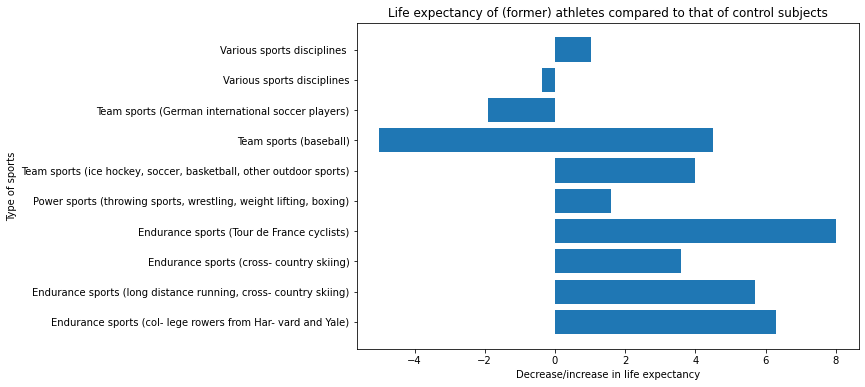

In [162]:
plt.figure(figsize = (9, 6))
plt.barh(former_athletes_table[" Type of sports"], former_athletes_table[" Reduction/increase in life expectancy (y)"])
plt.xlabel('Decrease/increase in life expectancy')
plt.ylabel('Type of sports')
plt.title("Life expectancy of (former) athletes compared to that of control subjects", fontsize = 12)
plt.show

What we see here is that the athletes with the longest lives are those that practiced <b>endurance sports like long-distance cycling (already mentioned above), rowing, long-distance running, and cross-country skiing</b>. So, if a person has some spare time, endurance sports are an excellent choice.

There is another fact that should not be ignored. There are sports in some studies that <b>decrease life span - like baseball and soccer</b>. Anyway, baseball is not that preferred among people who take care of their health. ;)

What Eurostat data will tell us about the other physical activities of Europeans?

Let's have a look at "Aerobic sports". It is a category of sports (like dancing, hiking, jogging, running, swimming, etc.) that is closer to the definition of endurance sports - and gives a lot more information about the physical activity of a nation than walking or cycling once a week. 

In [163]:
eurostat_data["PHYSACT"].unique()

array(['Walking to get to and from place',
       'Cycling to get to and from place', 'Aerobic sports',
       'Muscle-strengthening'], dtype=object)

In [164]:
f_aerobic = female_eurostat_lifespan[female_eurostat_lifespan["PHYSACT"] == "Aerobic sports"]

In [165]:
m_aerobic = male_eurostat_lifespan[male_eurostat_lifespan["PHYSACT"] == "Aerobic sports"]

In order data to seem more clean, we will filter out the small age groups, leaving in all ages:

In [166]:
f_aerobic = f_aerobic[f_aerobic["AGE"] == "Total"]

In [167]:
m_aerobic = m_aerobic[m_aerobic["AGE"] == "Total"]

In [168]:
f_aerobic["Value"].corr(f_aerobic["life expectancy"])

0.5264308090232215

In [169]:
m_aerobic["Value"].corr(m_aerobic["life expectancy"])

0.6331726097202235

There is a fair to moderate correlation between aerobic sports, practiced at least once a week, and life span. Let's see it on a graph:

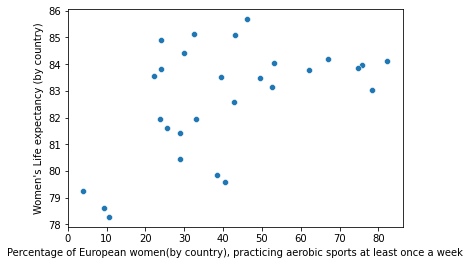

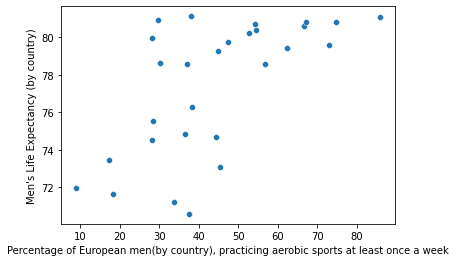

In [170]:
ax = sns.scatterplot(data=f_aerobic, x='Value', y='life expectancy')
ax.set(xlabel='Percentage of European women(by country), practicing aerobic sports at least once a week', ylabel="Women's Life expectancy (by country)")
plt.show()

ax = sns.scatterplot(data=m_aerobic, x='Value', y='life expectancy')
ax.set(xlabel='Percentage of European men(by country), practicing aerobic sports at least once a week', ylabel="Men's Life Expectancy (by country)")
plt.show()

It seems that when about half (or more) of a nation practices aerobic sports, the longevity of that nation is greater. This is fully true for the male case and partly for the female case. More or less these graphs support the relationship between aerobic sports and life expectancy. Even though, we don`t get the accuracy of the studies mentioned above.

<b>Muscle-strengthening physical activity</b>

In [171]:
f_muscle = female_eurostat_lifespan[female_eurostat_lifespan["PHYSACT"] == "Muscle-strengthening"]

In [172]:
m_muscle = male_eurostat_lifespan[male_eurostat_lifespan["PHYSACT"] == "Muscle-strengthening"]

In [173]:
f_muscle = f_muscle[f_muscle["AGE"] == "Total"]

In [174]:
m_muscle = m_muscle[m_muscle["AGE"] == "Total"]

In [175]:
f_muscle["Value"].corr(f_muscle["life expectancy"])

0.37868680772982005

In [176]:
m_muscle["Value"].corr(m_muscle["life expectancy"])

0.46217136678049026

There is a fair correlation between the percentage of people, who practice muscle-strengthening physical activity at least once a week, and the life expectancy of their nation.

#### More physical activities

We will return to the second table that we created earlier. It covers 20 studies on the relationship between physical activity and life expectancy. 

In order to be able to filter by the duration of the research (or the time that people and their physical activity were followed) and the longevity of the active group (in comparison with the inactive), we should make some changes.

In [177]:
phy_activity_life_span_table.head()

,Sex,Age (class) at start of followup,Authors,Country,"Number of individuals, duration of follow-up",Estimate additional years of life (95% CI) (years),Activity of the “active” group,Activity of the “inac- tive” group,Confounding factors
0,Women,30,Fraser and Shavlik [17],USA,#12y,"2.19 (0,92-3.45)*",At least 3 times per week vigorous all-day or ...,Less than 3 times per week intensive all-day a...,"Vegetarian/nonvegetarian, high/low nut consump..."
1,Women,30,Wen et al. [27],Taiwan,216.910 8.05 + 4.02y,"3.67 84,08 versus 87.75",Very vigorous physical activity (225.5 MET- h/...,Inactivity (<3.75 MET -h/week) during leisure ...,"Age, sex, education, physical work, smoking, a..."
2,Women,45,Bélanger et al. (28),Canada,#2y,6.9 81.7 versus 88.6,>= 1.5kcal/kg/d energy expenditure during leis...,<1.5kcal/kg/d energy expenditure during leisur...,NaN
3,Women,50,Jonker et al. [18],USA (Framingham Heart Study),2.813 12y,3.7 (2.6-4.9) 82.3 versus 86.0,High physical activity level (>33 METs/d),Low physical activity level (<30 METs/d),"Age, education, smoking, mar- ital status, car..."
4,Women,50,Nusselder et al. [20],The Netherlands,1.447 2y,1.8 (0.5-2.7) 76.5 versus 78.3,"Walking, biking, gardening, sports >17.33 METs...","Walking, biking, gardening, sports <12 METs/week","Age, sex, education, cardiovascular disease, c..."
5,Women,50,Nusselder et al. [19],USA (Framingham Heart Study),2.873 12y,3.4 (2.3-4.5) 82.7 versus 86.1,High physical activity level (>33 METs/d),Low physical activity level (<30 METs/d),"Age, sex, education, marital status, smoking, ..."
6,Women,65,Ferrucci et al. [29],USA,5.215 6y,Nonsmoker: 5.7 77.7 versus 83.4 Smoker: 4.2 76...,"High physical activity (gardening, walking, vi...",Activities as in the active group at most ‘onc...,NaN
7,Men,30,Fraser and Shavlik [17],USA,#12y,2.1 (0.4-39)*,At least 3 times per week vigorous all-day or ...,Less than 3 times per week intense all-day and...,"Vegetarian/nonvegetarian, high/low nut consump..."
8,Men,30,Wen et al. [27],Taiwan,199.265 8.05 4.02y,4.21 80.37 versus 84.58,Very vigorous physical activities (>=25.5 MET-...,Inactivity (<3.75 MET -h/week) during leisure ...,"Age, sex, education, physical work, smoking, d..."
9,Men,35-39,"Paffenbarger et al, (21]",USA (Harvard Alumni),16.936 16y,1.5*,"Physical activities (walking, climbing stairs,...","Physical activities (walking, climbing stairs,...","Age, cigarette smoking, arte- rial hypertensio..."


##### Data Tidying and Cleaning

- First, "duration of follow-up" will be a separate column (the eleventh study's duration between 12 - 16 years will become 16). We will remove "y" (for years") and hash signs in front of the numbers (they notify the reader that the number of participants given is common - it includes men and women).

In [179]:
phy_activity_life_span_table["Number of individuals, duration of follow-up"].values

array(['#12y', '216.910 8.05 + 4.02y', '#2y', '2.813 12y', '1.447 2y',
       '2.873 12y', '5.215 6y', '#12y', '199.265 8.05 4.02y',
       '16.936 16y', '16.936 12 - 16y', '1.712 40y', '#2y', '10,269 8y',
       '14.785 11y', '2.396 12y', '1.519 2y', '2.336 12y', '2.205 35y',
       '3.389 6y'], dtype=object)

In [180]:
list_of_durations = []
for row in phy_activity_life_span_table["Number of individuals, duration of follow-up"].values:
    parts = row.split(" ")
    duration = parts[-1]
    duration = duration.replace("y", "")
    duration = duration.replace("#", "")
    duration = float(duration)
    list_of_durations.append(duration)

In [181]:
phy_activity_life_span_table["Duration of follow-up"] = list_of_durations

- We are not interested in columns "Age (class) at start of followup", "Authors", "Country", "Number of individuals ...".

In [182]:
phy_activity_life_span_table.columns

Index(['Sex', 'Age (class) at start of followup', 'Authors', 'Country',
       'Number of individuals, duration of follow-up',
       'Estimate additional years of life (95% CI) (years)',
       'Activity of the “active” group', 'Activity of the “inac- tive” group',
       'Confounding factors', 'Duration of follow-up'],
      dtype='object')

In [183]:
phy_activity_life_span_table = phy_activity_life_span_table.drop(columns = ["Age (class) at start of followup", "Authors", "Country", "Number of individuals, duration of follow-up"])

 - There is a difference between the years that a smoker and nonsmoker can add to their lives if they are physically active. Women smokers can add 4.2 years to their life and men smokers: 3.4 years (in comparison with nonsmoking women: 5.7 and nonsmoking men: 5.2); the number of years is between 1.5 and 1.8 years less than the number of nonsmokers. We will remove this differentiation, leaving in only the nonsmokers' data (in order to make these strings - float numbers)

In [184]:
phy_activity_life_span_table[phy_activity_life_span_table["Estimate additional years of life (95% CI) (years)"].str.startswith("Nonsmoker")]

,Sex,Estimate additional years of life (95% CI) (years),Activity of the “active” group,Activity of the “inac- tive” group,Confounding factors,Duration of follow-up
6,Women,Nonsmoker: 5.7 77.7 versus 83.4 Smoker: 4.2 76...,"High physical activity (gardening, walking, vi...",Activities as in the active group at most ‘onc...,NaN,6.0
19,Men,Nonsmoker: 5.2 76.0 versus 81.2 Smoker: 3.4 74...,"High physical activity (gardening, walking, vi...",Activities as in the active group maximally o...,NaN,6.0


In [185]:
phy_activity_life_span_table["Estimate additional years of life (95% CI) (years)"] = replace_name(phy_activity_life_span_table["Estimate additional years of life (95% CI) (years)"], "Nonsmoker: 5.7 77.7 versus 83.4 Smoker: 4.2 76.1 versus 80.3", "5.7")
phy_activity_life_span_table["Estimate additional years of life (95% CI) (years)"] = replace_name(phy_activity_life_span_table["Estimate additional years of life (95% CI) (years)"], "Nonsmoker: 5.2 76.0 versus 81.2 Smoker: 3.4 74.5 versus 77.9", "5.2")


 - We will remove all other details from the column "Estimate additional years of life (95% CI) (years)" - like the average life span of the inactive and active group and the asterisk sign, notifying that the total life expectancy is not presented in the cited research. 

In [186]:
phy_activity_life_span_table["Estimate additional years of life (95% CI) (years)"].values

array(['2.19 (0,92-3.45)*', '3.67 84,08 versus 87.75',
       '6.9 81.7 versus 88.6', '3.7 (2.6-4.9) 82.3 versus 86.0',
       '1.8 (0.5-2.7) 76.5 versus 78.3', '3.4 (2.3-4.5) 82.7 versus 86.1',
       '5.7', '2.1 (0.4-39)*', '4.21 80.37 versus 84.58', '1.5*', '2.51*',
       '1.6*', '3.9 76.9 versus 80.8', '0.43*', '1.78*',
       '4.1 (2.8-5.4) 75.3 versus 79.4', '2.9 (0.9-4.3) 74.8 versus 76.7',
       '3.5 (2.5-4.6) 76.4 versus 80.0', '2.3 (1.3 - 3.3)*', '5.2'],
      dtype=object)

In [187]:
list_of_additional_years = []
for row in phy_activity_life_span_table["Estimate additional years of life (95% CI) (years)"].values:
    parts = row.split(" ")
    additional_years = parts[0]
    additional_years = additional_years.replace("*", "")
    additional_years = float(additional_years)
    list_of_additional_years.append(additional_years)


phy_activity_life_span_table["Estimate additional years of life (95% CI) (years)"] = list_of_additional_years

##### Analysis

In [188]:
phy_activity_life_span_table

,Sex,Estimate additional years of life (95% CI) (years),Activity of the “active” group,Activity of the “inac- tive” group,Confounding factors,Duration of follow-up
0,Women,2.19,At least 3 times per week vigorous all-day or ...,Less than 3 times per week intensive all-day a...,"Vegetarian/nonvegetarian, high/low nut consump...",12.00
1,Women,3.67,Very vigorous physical activity (225.5 MET- h/...,Inactivity (<3.75 MET -h/week) during leisure ...,"Age, sex, education, physical work, smoking, a...",4.02
2,Women,6.90,>= 1.5kcal/kg/d energy expenditure during leis...,<1.5kcal/kg/d energy expenditure during leisur...,NaN,2.00
3,Women,3.70,High physical activity level (>33 METs/d),Low physical activity level (<30 METs/d),"Age, education, smoking, mar- ital status, car...",12.00
4,Women,1.80,"Walking, biking, gardening, sports >17.33 METs...","Walking, biking, gardening, sports <12 METs/week","Age, sex, education, cardiovascular disease, c...",2.00
5,Women,3.40,High physical activity level (>33 METs/d),Low physical activity level (<30 METs/d),"Age, sex, education, marital status, smoking, ...",12.00
6,Women,5.70,"High physical activity (gardening, walking, vi...",Activities as in the active group at most ‘onc...,NaN,6.00
7,Men,2.10,At least 3 times per week vigorous all-day or ...,Less than 3 times per week intense all-day and...,"Vegetarian/nonvegetarian, high/low nut consump...",12.00
8,Men,4.21,Very vigorous physical activities (>=25.5 MET-...,Inactivity (<3.75 MET -h/week) during leisure ...,"Age, sex, education, physical work, smoking, d...",4.02
9,Men,1.50,"Physical activities (walking, climbing stairs,...","Physical activities (walking, climbing stairs,...","Age, cigarette smoking, arte- rial hypertensio...",16.00


Logically, the extended pieces of research should give more reliable results. Let's see which they are:

In [189]:
extended_researches = phy_activity_life_span_table.sort_values("Duration of follow-up", ascending=False).head(10)

In [190]:
extended_researches

,Sex,Estimate additional years of life (95% CI) (years),Activity of the “active” group,Activity of the “inac- tive” group,Confounding factors,Duration of follow-up
11,Men,1.60,Physically active,Sedentary,"Age, family history of both parents, mean bloo...",40.0
18,Men,2.30,Regularly hard physical training or competitiv...,"Spending most of the time reading, watching TV...","Smoking, weight and height, alcohol use, obesi...",35.0
10,Men,2.51,"Physical activities (walking, climbing, stairs...","Physical activities (walking, climbing, stairs...","Age, cigarelte smoking, arte= rial hypertensio...",16.0
9,Men,1.50,"Physical activities (walking, climbing stairs,...","Physical activities (walking, climbing stairs,...","Age, cigarette smoking, arte- rial hypertensio...",16.0
7,Men,2.10,At least 3 times per week vigorous all-day or ...,Less than 3 times per week intense all-day and...,"Vegetarian/nonvegetarian, high/low nut consump...",12.0
17,Men,3.50,High physical activity level (>33 METs/d),Low physical activity level (<30 METs/d),"Age, sex, education, marital status, body mass...",12.0
15,Men,4.10,High physical activity level (>30 METs/d),Low physical activity level (<30 METs/d),"Age, education, smoking, mar- ital status, car...",12.0
0,Women,2.19,At least 3 times per week vigorous all-day or ...,Less than 3 times per week intensive all-day a...,"Vegetarian/nonvegetarian, high/low nut consump...",12.0
5,Women,3.40,High physical activity level (>33 METs/d),Low physical activity level (<30 METs/d),"Age, sex, education, marital status, smoking, ...",12.0
3,Women,3.70,High physical activity level (>33 METs/d),Low physical activity level (<30 METs/d),"Age, education, smoking, mar- ital status, car...",12.0


Their results seem more conservative. Let's check: 

In [191]:
print(f'Results of long-duration researches(>= 12): {extended_researches["Estimate additional years of life (95% CI) (years)"].mean()} vs results of all researches: {phy_activity_life_span_table["Estimate additional years of life (95% CI) (years)"].mean()}')

Results of long-duration researches(>= 12): 2.69 vs results of all researches: 3.1695


They, though, focus on men. This is also a possible reason for the smaller numbers. That's why we are going to use all studies.

What is the minimum, maximum and average number of years that a woman and a man can add to their lives thanks to their physical activity?

In [192]:
phy_activity_life_span_table.Sex.unique()

array(['Women', 'Men', 'Men '], dtype=object)

In [193]:
women_table = phy_activity_life_span_table[phy_activity_life_span_table["Sex"] == 'Women'] 
print(f'Women: from {women_table["Estimate additional years of life (95% CI) (years)"].min()} to {women_table["Estimate additional years of life (95% CI) (years)"].max()} years, average: {round(women_table["Estimate additional years of life (95% CI) (years)"].mean(), 2)}')
#Because there are two different kinds of men`s values:
men_table = phy_activity_life_span_table[(phy_activity_life_span_table["Sex"] == 'Men') | (phy_activity_life_span_table["Sex"] == 'Men ')]
print(f'Мen: from {men_table["Estimate additional years of life (95% CI) (years)"].min()} to {men_table["Estimate additional years of life (95% CI) (years)"].max()} years, average: {round(men_table["Estimate additional years of life (95% CI) (years)"].mean(), 2)}')
print(f'Difference: {round(women_table["Estimate additional years of life (95% CI) (years)"].mean() - men_table["Estimate additional years of life (95% CI) (years)"].mean(), 2)}') 

Women: from 1.8 to 6.9 years, average: 3.91
Мen: from 0.43 to 5.2 years, average: 2.77
Difference: 1.14


Here again, we can see that the potential of physical activity to make life longer is bigger in the case of women. We already know that from this study [[4]](#Cell4). We got the same result by our steps data analysis. The difference between the average number of years is 1.14. So, a physically active woman can live from 1.8 to almost 7 years more! A physically active man - from 0.43 to more than 5 years. The results are quite impressive.


Let's see what kind of activity made the lives of participants longer:

For women:

In [194]:
top_years_women = phy_activity_life_span_table[phy_activity_life_span_table["Sex"] == "Women"].sort_values("Estimate additional years of life (95% CI) (years)", ascending=False).head(3)
print(f"Top physical activities among women:")
for result in top_years_women['Activity of the “active” group'].unique():
    print(f"--- {result}")

Top physical activities among women:
--- >= 1.5kcal/kg/d energy expenditure during leisure time
--- High physical activity (gardening, walking, vigorous exercise) each once per week or several times per month or one of these activities several times per week and another activity once per week or several times per month
--- High physical activity level (>33 METs/d)


The most optimistic research (+6.9 years) activity group has physical activity expenditure > = 1.5kcal/kg/d. So, for a 60-kg woman, that means 1.5 * 60 = 90kcal per day. Translated into different activities this means <b>around 26 minutes walking or 23 min slow stair climbing or 14 min "bicycling to or from work" or 13 min. jogging or 18 min dancing</b> [[28]](#Cell28) 

MET (from the third research) is Metabolic equivalent value (1MET = 1 kcal per h per kg of body weight or MET = kcal/kg*h). It is not clear if the sheer 24-hour-existence (which makes about 24 MET) is included in the 33 METs per day. Probably it is. Examples for activities and their MET values: walking (3), swimming moderately to hard (8-11), jogging, 10.9 km/h (11.2) [[29]](#Cell29). 

In [195]:
top_years_men = phy_activity_life_span_table[phy_activity_life_span_table["Sex"] == "Men"].sort_values("Estimate additional years of life (95% CI) (years)", ascending=False).head(3)
print(f"Top physical activities among men:")
for result in top_years_men['Activity of the “active” group'].unique():
    print(f"--- {result}")

Top physical activities among men:
--- High physical activity (gardening, walking, vigorous exercise) each once per week or several times. per month or one of these activities several times per week and another activity once per week or several times per month
--- High physical activity level (>30 METs/d)
--- >=1.5kcal/kg/d energy expenditure during leisure time


We see that men`s activities are the same as those of women. In both cases <b>at least once per week gardening, walking and vigorous exercise </b>.

### Conclusion

From what has been said so far, it turned out that physical activity optimum is not too far away from the daily activity of many people. Walking or cycling to work and back can cover the body's need for physical activity and decrease many health risks substantially. 

There are two important things to remember though. 

Walking for 20 minutes to an hour or cycling for 20 minutes daily is the minimum of the optimum. Almost all studies prove that the more exercise, the better. If they are vigorous and require endurance, even the better. So, if we have some time during the weekends, among the best options for sports are endurance sports (long-distance cycling, rowing, long-distance running, and cross-country skiing, even though an average person probably won't achieve the level of athletes, therefore the potential years cited earlier). Some say that tennis is the king among these sports (it adds 9.7 years to life according to this research [[31]](#Cell31)). But tennis was not included in the studies that we explored. 

The second thing is that physical activity is especially important for women's health after menopause, and hence, has great potential to improve female life expectancy.

### References

<a id='Cell1'>[1]</a> Physical activity. Recommended levels of physical activity for health http://www.emro.who.int/health-education/physical-activity/recommended-levels-of-physical-activity-for-health.html. Accessed 25 August 2022.

<a id='Cell2'>[2]</a> Aiming for 10,000 steps? It turns out 7,000 could be enough to cut your risk of early death. https://www.inverse.com/mind-body/where-did-10000-steps-come-from. Accessed 25 August 2022.

<a id='Cell3'>[3]</a> Carl D. Reimers, G Knapp, Anne Kerstin Reimers. Does Physical Activity Increase Life Expectancy? A Review of the Literature. https://www.researchgate.net/publication/229327202_Does_Physical_Activity_Increase_Life_Expectancy_A_Review_of_the_Literature. Accessed 20 August 2022.

<a id='Cell4'>[4]</a> Rocío Fernández-Ballesteros, Elizabeth Valeriano-Lorenzo, Macarena Sánchez-Izquierdo, Juan Botella. Behavioral Lifestyles and Survival: A Meta-Analysis. https://www.frontiersin.org/articles/10.3389/fpsyg.2021.786491/full. Accessed 20 August 2022.

<a id='Cell5'>[5]</a> Haldun Akoglu. User's guide to correlation coefficients. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/. Accessed 18 August 2022.

<a id='Cell6'>[6]</a> Life expectancy at birth (years). https://www.who.int/data/gho/data/indicators/indicator-details/GHO/life-expectancy-at-birth-(years). Accessed 14 August 2022.

<a id='Cell7'>[7]</a> Tim Althoff, Rok Sosic, Jennifer L. Hicks, Abby C. King, Scott L. Delp, Jure Leskovec. "Large-scale physical activity data reveal worldwide activity inequality". 
- (Information about the project) http://activityinequality.stanford.edu. Accessed 14 August 2022.
- (Data: average steps) https://github.com/timalthoff/activityinequality/blob/master/data/world_map_steps_average_20170510.csv. Accessed 14 August 2022.
- (Raw data: average steps) https://raw.githubusercontent.com/timalthoff/activityinequality/master/data/world_map_steps_average_20170510.csv. Accessed 14 August 2022.
- (Raw data: average steps by gender) https://github.com/timalthoff/activityinequality/blob/master/data/steps_percentiles_by_country_gender_20170511.csv. Accessed 16 August 2022.

<a id='Cell8'>[8]</a> Middle Income Countries 2022. https://worldpopulationreview.com/country-rankings/middle-income-countries. Accessed 20 August 2022. 

<a id='Cell9'>[9]</a>  
 - Life expectancy at birth, total (years) - Hong Kong SAR, China. https://data.worldbank.org/indicator/SP.DYN.LE00.IN?locations=HK. Accessed 14 August 2022.
 - Life expectancy at birth, male (years) - Hong Kong SAR, China. https://data.worldbank.org/indicator/SP.DYN.LE00.MA.IN?locations=HK. Accessed 14 August 2022.
 - Life expectancy at birth, female (years) - Hong Kong SAR, China. https://data.worldbank.org/indicator/SP.DYN.LE00.FE.IN?locations=HK. Accessed 14 August 2022.

<a id='Cell10'>[10]</a>  
 - Life expectancy at birth, total (years) - Macau SAR, China. https://data.worldbank.org/indicator/SP.DYN.LE00.IN?locations=MO. Accessed 14 August 2022.
 - Life expectancy at birth, male (years) - Macau SAR, China. https://data.worldbank.org/indicator/SP.DYN.LE00.MA.IN?locations=MO. Accessed 14 August 2022.
 - Life expectancy at birth, female (years) - Macau SAR, China. https://data.worldbank.org/indicator/SP.DYN.LE00.FE.IN?locations=MO. Accessed 14 August 2022.

<a id='Cell11'>[11]</a> Life expectancy at birth. https://population.un.org/dataportal/data/indicators/61/locations/158/start/2000/end/2022/table/pivotbylocation. Accessed 14 August 2022. 

<a id='Cell12'>[12]</a> Average life expectancy hits 80.86 in Taiwan. https://taiwantoday.tw/news.php?unit=10&post=182736. Accessed 14 August 2022. 

<a id='Cell13'>[13]</a>  
 - Life expectancy at birth, total (years) - Puerto Rico. https://data.worldbank.org/indicator/SP.DYN.LE00.IN?locations=PR. Accessed 15 August 2022.
 - Life expectancy at birth, male (years) - Puerto Rico. https://data.worldbank.org/indicator/SP.DYN.LE00.MA.IN?locations=PR. Accessed 15 August 2022.
 - Life expectancy at birth, female (years) - Puerto Rico. https://data.worldbank.org/indicator/SP.DYN.LE00.FE.IN?locations=PR. Accessed 15 August 2022.

<a id='Cell14'>[14]</a> Life expectancy at birth, total (years) - Puerto Rico, United States. https://data.worldbank.org/indicator/SP.DYN.LE00.IN?locations=PR-US. Accessed 15 August 2022. 

<a id='Cell15'>[15]</a>  
 - Life expectancy at birth, total (years) - West Bank and Gaza. https://data.worldbank.org/indicator/SP.DYN.LE00.IN?locations=PS. Accessed 15 August 2022.
 - Life expectancy at birth, male (years) - West Bank and Gaza. https://data.worldbank.org/indicator/SP.DYN.LE00.MA.IN?locations=PS. Accessed 15 August 2022.
 - Life expectancy at birth, female (years) - West Bank and Gaza. https://data.worldbank.org/indicator/SP.DYN.LE00.FE.IN?locations=PS. Accessed 15 August 2022.

<a id='Cell16'>[16]</a>  
 - Life expectancy at birth, total (years) - Israel. https://data.worldbank.org/indicator/SP.DYN.LE00.IN?locations=IL. Accessed 15 August 2022.
 - Life expectancy at birth, male (years) - Israel. https://data.worldbank.org/indicator/SP.DYN.LE00.MA.IN?locations=IL. Accessed 15 August 2022.
 - Life expectancy at birth, female (years) - Israel. https://data.worldbank.org/indicator/SP.DYN.LE00.FE.IN?locations=IL. Accessed 15 August 2022.

<a id='Cell17'>[17]</a> Large-scale physical activity data reveal worldwide
activity inequality. http://activityinequality.stanford.edu/docs/activity-inequality-althoffetal-nature.pdf. Accessed 18 August 2022. 

<a id='Cell18'>[18]</a> How Long Does it Take to Walk 7000 Steps. https://online-calculator.org/how-long-does-it-take-to-walk-7000-steps. Accessed 15 August 2022. 

<a id='Cell19'>[19]</a> Taulant Muka, Clare Oliver-Williams, Setor Kunutsor, Joop S E Laven, Bart C J M Fauser, Rajiv Chowdhury, Maryam Kavousi, Oscar H Franco. Association of Age at Onset of Menopause and Time Since Onset of Menopause With Cardiovascular Outcomes, Intermediate Vascular Traits, and All-Cause Mortality: A Systematic Review and Meta-analysis. https://pubmed.ncbi.nlm.nih.gov/27627190/. Accessed 23 August 2022. 

<a id='Cell20'>[20]</a> Lynda Lisabeth, Cheryl Bushnell. Menopause and Stroke: An Epidemiologic Review. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3615462/. Accessed 23 August 2022. 

<a id='Cell21'>[21]</a> Danyang Tian, Jinqi Meng. Exercise for Prevention and Relief of Cardiovascular Disease: Prognoses, Mechanisms, and Approaches. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6481017/. Accessed 24 August 2022. 

<a id='Cell22'>[22]</a> European Health Interview Survey (EHIS). https://ec.europa.eu/eurostat/cache/metadata/en/hlth_det_esms.htm. Accessed 16 August 2022. 

<a id='Cell23'>[23]</a> Performing (non-work-related) physical activities by sex, age and educational attainment level. https://appsso.eurostat.ec.europa.eu/nui/show.do?query=BOOKMARK_DS-815939_QID_-37737831_UID_-3F171EB0&layout=PHYSACT,L,X,0;GEO,L,Y,0;UNIT,L,Z,0;TIME,C,Z,1;ISCED11,L,Z,2;SEX,L,Z,3;AGE,L,Z,4;INDICATORS,C,Z,5;&zSelection=DS-815939UNIT,PC;DS-815939AGE,TOTAL;DS-815939TIME,2019;DS-815939ISCED11,TOTAL;DS-815939SEX,T;DS-815939INDICATORS,OBS_FLAG;&rankName1=TIME_1_0_-1_2&rankName2=ISCED11_1_2_-1_2&rankName3=UNIT_1_2_-1_2&rankName4=AGE_1_2_-1_2&rankName5=INDICATORS_1_2_-1_2&rankName6=SEX_1_2_-1_2&rankName7=PHYSACT_1_2_0_0&rankName8=GEO_1_2_0_1&rStp=&cStp=&rDCh=&cDCh=&rDM=true&cDM=true&footnes=false&empty=false&wai=false&time_mode=ROLLING&time_most_recent=false&lang=EN&cfo=%23%23%23%2C%23%23%23.%23%23%23&eub_bm=HLTH_EHIS_PE3E$DV_294&lang=en. Accessed 16 August 2022. 

<a id='Cell24'>[24]</a> Health-enhancing physical activity statistics. https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Health-enhancing_physical_activity_statistics#Non-work-related_physical_activity. Accessed 18 August 2022. 

<a id='Cell25'>[25]</a> Yang Zhao, Fulan Hu, Yifei Feng, Xingjin Yang, Yang Li, Chunmei Guo, Quanman Li, Gang Tian, Ranran Qie, Minghui Han, Shengbing Huang, Xiaoyan Wu, Yanyan Zhang, Yuying Wu, Dechen Liu, Dongdong Zhang, Cheng Cheng, Ming Zhang, Yongli Yang, Xuezhong Shi, Jie Lu, Dongsheng Hu. Association of Cycling with Risk of All-Cause and Cardiovascular Disease Mortality: A Systematic Review and Dose-Response Meta-analysis of Prospective Cohort Studies. https://pubmed.ncbi.nlm.nih.gov/33774807/. Accessed 22 August 2022. 

<a id='Cell26'>[26]</a> Rahul Goel,Anna Goodman,Rachel Aldred,Ryota Nakamura,Lambed Tatah,Leandro Martin Totaro Garcia,Belen Zapata-Diomedi,Thiago Herick de Sa,Geetam Tiwari,Audrey de Nazelle,Marko Tainio,Ralph Buehler,Thomas Götschi &James Woodcock. Cycling behaviour in 17 countries across 6 continents: levels of cycling, who cycles, for what purpose, and how far? https://www.tandfonline.com/doi/full/10.1080/01441647.2021.1915898?scroll=top&needAccess=true. Accessed 22 August 2022. 

<a id='Cell27'>[27]</a> Luka Stular. How Much do Pro Cyclists Train? (Real Numbers Revealed). https://cyclingbeginner.com/how-much-do-pro-cyclists-train/. Accessed 22 August 2022. 

<a id='Cell28'>[28]</a> How many wiki. https://www.howmany.wiki/calories-burned/. Accessed 23 August 2022. 

<a id='Cell29'>[29]</a> Metabolic equivalent of task. https://en.wikipedia.org/wiki/Metabolic_equivalent_of_task. Accessed 23 August 2022. 

<a id='Cell30'>[30]</a> Average Cycling Speed – What is it? https://www.bikelockwiki.com/average-cycling-speed/. Accessed 25 August 2022. 

<a id='Cell31'>[31]</a> Peter Schnohr, James H. O’Keefe, Andreas Holtermann, Carl J. Lavie, Peter Lange, Gorm Boje Jensen, Jacob Louis Marott. Various Leisure-Time Physical Activities Associated With Widely Divergent Life Expectancies: The Copenhagen City Heart Study https://www.mayoclinicproceedings.org/article/S0025-6196(18)30538-X/fulltext#relatedArticles. Accessed 25 August 2022. 